In [2]:
#Basic Libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns

#Encoding and Scaling

from sklearn.preprocessing import MinMaxScaler, LabelEncoder, RobustScaler, StandardScaler
import category_encoders as ce

#Outlier Libraries
from sklearn.neighbors import NearestNeighbors, KNeighborsRegressor
from sklearn.cluster import DBSCAN
from sklearn.neighbors import LocalOutlierFactor
from sklearn.cluster import KMeans
from sklearn.impute import KNNImputer
from sklearn.impute import SimpleImputer
from scipy import stats

import itertools
import os
import glob


In [3]:
import warnings
with warnings.catch_warnings():
# ignore all caught warnings
    warnings.filterwarnings("ignore")
# execute code that will generate warning

# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

In [4]:
#Reading Multiple file in the directory
def read_csv_file(file_path):
    data = []
    all_files = glob.glob(os.path.join(file_path + "/pre*.csv"))
    print('File names:', all_files)
    for filename in all_files:
        df = pd.read_csv(filename, index_col=None, header=0)
        data.append(df)
    df=pd.concat(data, axis=0, ignore_index=True)
    print('rows and coumns',df.shape)
    return df 

In [5]:
Maint_data = read_csv_file(r'C:\Users\sunil\Capstone')
Maint_data.head(10)
 

File names: ['C:\\Users\\sunil\\Capstone\\predictive_maintenance.csv']
rows and coumns (10000, 10)


UDI Product ID Type  Air temperature [K]  Process temperature [K]  \
0    1     M14860    M                298.1                    308.6   
1    2     L47181    L                298.2                    308.7   
2    3     L47182    L                298.1                    308.5   
3    4     L47183    L                298.2                    308.6   
4    5     L47184    L                298.2                    308.7   
5    6     M14865    M                298.1                    308.6   
6    7     L47186    L                298.1                    308.6   
7    8     L47187    L                298.1                    308.6   
8    9     M14868    M                298.3                    308.7   
9   10     M14869    M                298.5                    309.0   

   Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Target Failure Type  
0                    1551         42.8                0       0   No Failure  
1                    1408         46.3                3       0   No Failure  
2                    1498         49.4                5       0   No Failure  
3                    1433         39.5                7       0   No Failure  
4                    1408         40.0                9       0   No Failure  
5                    1425         41.9               11       0   No Failure  
6                    1558         42.4               14       0   No Failure  
7                    1527         40.2               16       0   No Failure  
8                    1667         28.6               18       0   No Failure  
9                    1741         28.0               21       0   No Failure

In [6]:
# converting column name for my easiness
Maint_data.rename(columns={'Air temperature [K]':'AirTemperature','Process temperature [K]': 'ProcessTemperature',
                          'Rotational speed [rpm]': 'RotationalSpeed','Torque [Nm]':'Torque','Tool wear [min]':'Toolwear'},inplace=True)

In [7]:
Maint_data.columns

Index(['UDI', 'Product ID', 'Type', 'AirTemperature', 'ProcessTemperature',
       'RotationalSpeed', 'Torque', 'Toolwear', 'Target', 'Failure Type'],
      dtype='object')

## Data Preparation  and Pre processing

In [8]:
def pre_process(Data):
    
    print("Data Counts: \n\n{}".format(Data.count()))
    
    print("\nBasic Stat of data: \n{}".format(Data.describe()))
    
    print("\nBasic Info of data: \n{}".format(Data.info()))
    
    print("\nUnique value in each column \n{}".format(Data.nunique(axis=0)))
     
    #Lets check duplicates

    
    if Data.duplicated().sum() > 0:
        Data.drop_duplicates(keep='first', inplace=True)
    # reset index, because we droped  rows
        Data.reset_index(drop = True, inplace = True)
    else:
        print('Duplicate Count',Data.duplicated().sum())
        
    
    
    return Data

    
def drop_data(Data):
    Data.drop((dropcolumns),axis=1,inplace=True)
    return Data

def geNumericCols(data):
    return data.select_dtypes(include=["number"]).columns   
def geCategoricCols(data):
    return data.select_dtypes(include=["object","category"]).columns 

In [9]:
dropcolumns = ['UDI','Product ID']
pre_process(Maint_data)
drop_data(Maint_data)
NumericCols = geNumericCols(Maint_data)
CategoricCols=geCategoricCols(Maint_data)

Data Counts: 

UDI                   10000
Product ID            10000
Type                  10000
AirTemperature        10000
ProcessTemperature    10000
RotationalSpeed       10000
Torque                10000
Toolwear              10000
Target                10000
Failure Type          10000
dtype: int64

Basic Stat of data: 
               UDI  AirTemperature  ProcessTemperature  RotationalSpeed  \
count  10000.00000    10000.000000        10000.000000     10000.000000   
mean    5000.50000      300.004930          310.005560      1538.776100   
std     2886.89568        2.000259            1.483734       179.284096   
min        1.00000      295.300000          305.700000      1168.000000   
25%     2500.75000      298.300000          308.800000      1423.000000   
50%     5000.50000      300.100000          310.100000      1503.000000   
75%     7500.25000      301.500000          311.100000      1612.000000   
max    10000.00000      304.500000          313.800000      2886.00000

I am droping the two columns, because We do not see any significance of these columns to derive model

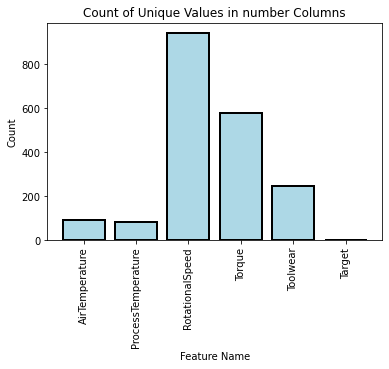

In [10]:
plt.xticks(np.arange(len(Maint_data.select_dtypes(np.number).nunique())),Maint_data.select_dtypes(np.number).columns,rotation=90)
plt.bar(np.arange(len(Maint_data.select_dtypes(np.number).nunique())),Maint_data.select_dtypes(np.number).nunique(),color = 'lightblue',edgecolor = 'k', linewidth = 2)
plt.xlabel('Feature Name'); 
plt.ylabel('Count')
plt.title('Count of Unique Values in number Columns')
plt.show()

Even we have 10000 rows, the attributes have uniques values. Comparitively Rotational speed has more unique.

#### Visualize Descriptive Statistics

In [11]:
def describe_plot(combined_df):
    
    describe_num_df = combined_df.describe(include=['int64','float64'])
    describe_num_df.reset_index(inplace=True)
    # To remove any variable from plot
    describe_num_df = describe_num_df[describe_num_df['index'] != 'count']
    for i in NumericCols:
        if i in ['index']:
            continue
        ax = sns.factorplot(x='index', y=i, data=describe_num_df)
        plt.show()
    return ax

D:\Anaconda_Installation\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


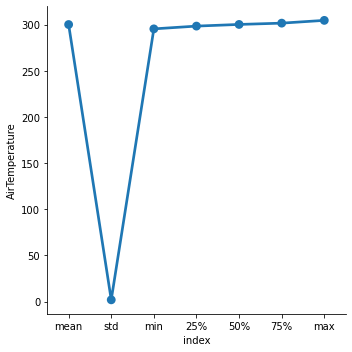

D:\Anaconda_Installation\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


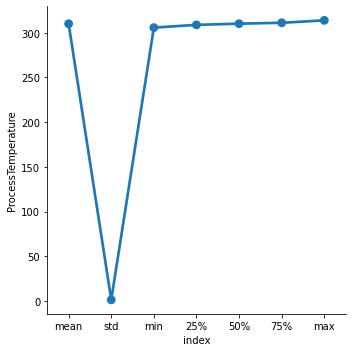

D:\Anaconda_Installation\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


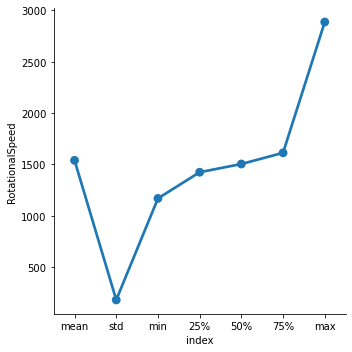

D:\Anaconda_Installation\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


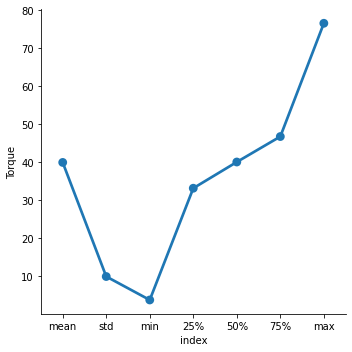

D:\Anaconda_Installation\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


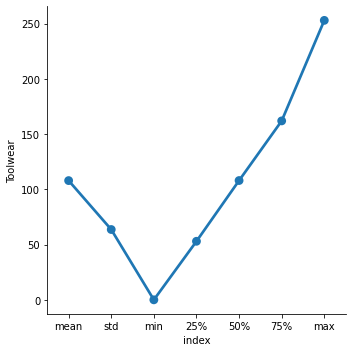

D:\Anaconda_Installation\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


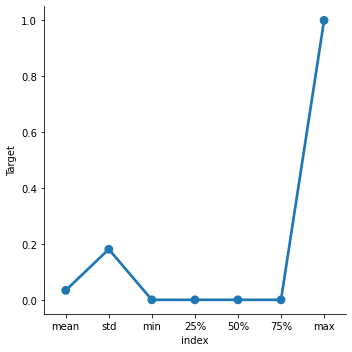

In [12]:
describe_plot(Maint_data)

In [13]:
def missing_zero_values_table(df):
        zero_val = (df == 0.00).astype(int).sum(axis=0)
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        print(mis_val_percent)
        mz_table = pd.concat([zero_val, mis_val, mis_val_percent], axis=1)
        mz_table = mz_table.rename(
        columns = {0 : 'Zero Values', 1 : 'Missing Values', 2 : '% of Total Values'})
        mz_table['Total Zero Missing Values'] = mz_table['Zero Values'] + mz_table['Missing Values']
        mz_table['% Total Zero Missing Values'] = 100 * (mz_table['Total Zero Missing Values'] / len(df))
        mz_table['Data Type'] = df.dtypes
        #mz_table = mz_table[ mz_table.iloc[:,1] != 0].sort_values('% of Total Values', ascending=False).round(4)
        mz_table = mz_table.sort_values('% of Total Values', ascending=False).round(4)
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns and " + str(df.shape[0]) + " Rows.\n"      
            "There are " + str(mz_table.shape[0]) +
              " columns that have missing values.")
        
        
        sns.heatmap(pd.DataFrame(df.isnull().sum() / df.shape[0] * 100), annot=True,cmap=sns.color_palette("cool"), linewidth=1, linecolor="white")

        return mz_table

Type                  0.0
AirTemperature        0.0
ProcessTemperature    0.0
RotationalSpeed       0.0
Torque                0.0
Toolwear              0.0
Target                0.0
Failure Type          0.0
dtype: float64
Your selected dataframe has 8 columns and 10000 Rows.
There are 8 columns that have missing values.


Zero Values  Missing Values  % of Total Values  \
Type                          0               0                0.0   
AirTemperature                0               0                0.0   
ProcessTemperature            0               0                0.0   
RotationalSpeed               0               0                0.0   
Torque                        0               0                0.0   
Toolwear                    120               0                0.0   
Target                     9661               0                0.0   
Failure Type                  0               0                0.0   

                    Total Zero Missing Values  % Total Zero Missing Values  \
Type                                        0                         0.00   
AirTemperature                              0                         0.00   
ProcessTemperature                          0                         0.00   
RotationalSpeed                             0                         0.00   
Torque                                      0                         0.00   
Toolwear                                  120                         1.20   
Target                                   9661                        96.61   
Failure Type                                0                         0.00   

                   Data Type  
Type                  object  
AirTemperature       float64  
ProcessTemperature   float64  
RotationalSpeed        int64  
Torque               float64  
Toolwear               int64  
Target                 int64  
Failure Type          object

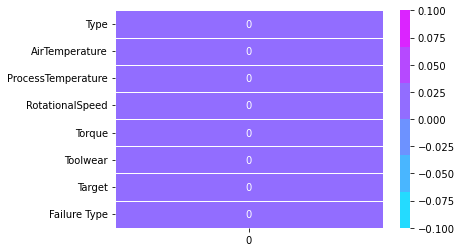

In [14]:
missing_zero_values_table(Maint_data)

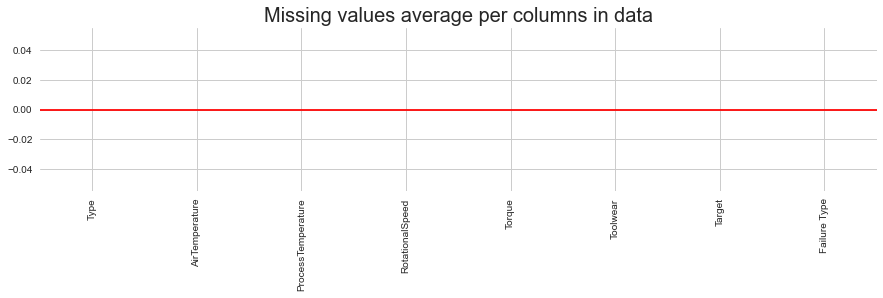

In [15]:
# set up aesthetic design
plt.style.use('seaborn')
sns.set_style('whitegrid')
            
# create NA plot for train data
plt.figure(figsize = (15,3)) # positioning for 1st plot
Maint_data.isnull().sum().sort_values(ascending = False).plot.bar(color = 'grey')
plt.axhline(y=np.mean(Maint_data.isnull().sum()), color='r', linestyle='-')
plt.title('Missing values average per columns in data', fontsize = 20)
plt.show()

In [16]:
def imputeByKNN(data, numericCols):

    dataNumeric = data[numericCols]
    nonNumericCols = [col for col in data.columns if col not in numericCols]
    d2 = data[nonNumericCols]

    imputer = KNNImputer(n_neighbors=2)
    imputedDataKNN = imputer.fit_transform(dataNumeric.values)
    d1 = pd.DataFrame(imputedDataKNN)
    d1.columns = dataNumeric.columns
    imputedData = pd.concat([d1, d2], axis=1)
    return imputedData

def imputeByMean(data, numericCols,ops):
    imputedMean = SimpleImputer(strategy=ops)  # for median imputation replace 'mean' with 'median'
    cols = data.columns
    nonNumeric = set(cols) - set(numericCols)
    dataNumeric = data.drop(nonNumeric, axis=1)
    imputedMean.fit(dataNumeric)
    imputedData = imputedMean.transform(dataNumeric)
    d1 = pd.DataFrame(imputedData)
    d1.columns = dataNumeric.columns
    finalImputedData = pd.concat([d1, data.loc[:, nonNumeric]], axis=1)
    return finalImputedData

def imputeByMode(Data,Categorical):
    Data = Data.fillna(Data.mode().iloc[0])
    return Data


In [17]:
if Maint_data.isnull().values.any() :
    Imputed_Data = imputeByKNN(Maint_data,NumericCols)
    Imputed_Data = imputeByMode(Imputed_Data,CategoricCols)
else:
    Imputed_Data = Maint_data.copy()
    

inference: 
    
    The Data is distributed eaually with specified standard deviation.
    We do not observe any missing values.Atthe same time 'Tool Wear' attribue good number of zeros.
    so we can observe the the gradual failure for the tool happened in the nextrun after installation.
    

### Dealing with invalid values i.e negative values

In [18]:
#As torque should not be negative, checking negative values
def invalid_value(Data):
    
    if (Data < 0 ).any().any() == True :
        Data[Data<0] = Data.mode()
    else:
        print((Data < 0 ).any().any())
    
    return Data
      

In [19]:
invalid_value(Maint_data['Torque'])

False


0       42.8
1       46.3
2       49.4
3       39.5
4       40.0
        ... 
9995    29.5
9996    31.8
9997    33.4
9998    48.5
9999    40.2
Name: Torque, Length: 10000, dtype: float64

### UniVariate Analysis

In [20]:
Imputed_Data.columns

Index(['Type', 'AirTemperature', 'ProcessTemperature', 'RotationalSpeed',
       'Torque', 'Toolwear', 'Target', 'Failure Type'],
      dtype='object')

In [21]:
print(Maint_data['Failure Type'].unique())
print("Percentage wise Target data")
print(Maint_data['Failure Type'].value_counts()*100/Maint_data.shape[0])

['No Failure' 'Power Failure' 'Tool Wear Failure' 'Overstrain Failure'
 'Random Failures' 'Heat Dissipation Failure']
Percentage wise Target data
No Failure                  96.52
Heat Dissipation Failure     1.12
Power Failure                0.95
Overstrain Failure           0.78
Tool Wear Failure            0.45
Random Failures              0.18
Name: Failure Type, dtype: float64


In [22]:
print(Maint_data['Target'].unique())
print(Maint_data['Target'].value_counts())

[0 1]
0    9661
1     339
Name: Target, dtype: int64


In [23]:
#Count Function for each categorical variable with percentage
def sns_count(Data,Xaxis):
    sns.set(style="whitegrid")
    #fig, axs = plt.subplots(1, 2, figsize=(10,4))
    plt.figure(figsize=(8,5))
    total = float(len(Data))
    ax = sns.countplot(x=Xaxis, data=Data)
    ax.set_xticklabels(Data[Xaxis].unique(),Rotation=90);
    #ax = sns.countplot(x=Xaxis, data=Data,hue=Target,ax = axs[1])
    ax.set_xticklabels(Data[Xaxis].unique(),Rotation=90);
    plt.title('Data provided for each event', fontsize=20)
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width()
        y = p.get_height()
        ax.annotate(percentage, (x, y),ha='center')
    plt.show()

C:\Users\sunil\AppData\Local\Temp/ipykernel_11196/2609621376.py:8: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax.set_xticklabels(Data[Xaxis].unique(),Rotation=90);
C:\Users\sunil\AppData\Local\Temp/ipykernel_11196/2609621376.py:10: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax.set_xticklabels(Data[Xaxis].unique(),Rotation=90);


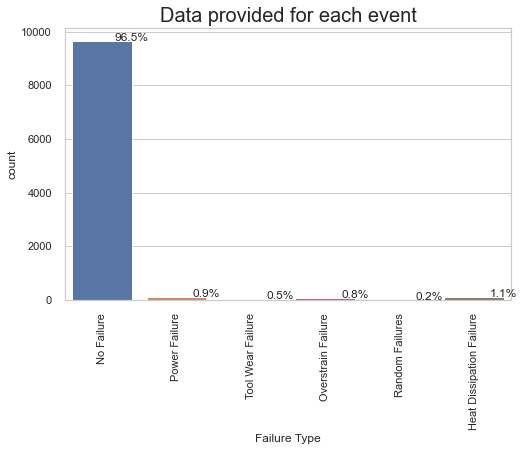

C:\Users\sunil\AppData\Local\Temp/ipykernel_11196/2609621376.py:8: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax.set_xticklabels(Data[Xaxis].unique(),Rotation=90);
C:\Users\sunil\AppData\Local\Temp/ipykernel_11196/2609621376.py:10: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax.set_xticklabels(Data[Xaxis].unique(),Rotation=90);


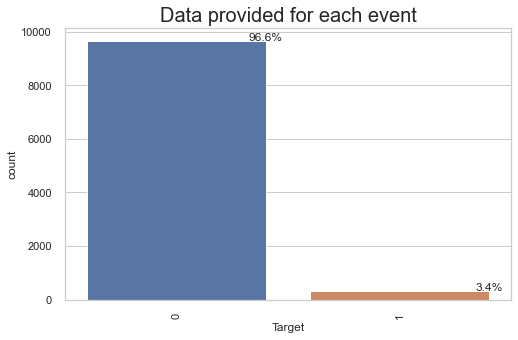

C:\Users\sunil\AppData\Local\Temp/ipykernel_11196/2609621376.py:8: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax.set_xticklabels(Data[Xaxis].unique(),Rotation=90);
C:\Users\sunil\AppData\Local\Temp/ipykernel_11196/2609621376.py:10: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax.set_xticklabels(Data[Xaxis].unique(),Rotation=90);


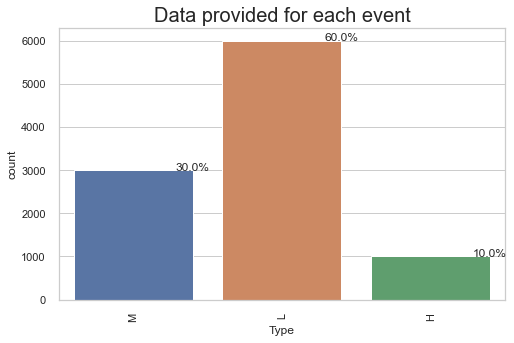

In [24]:
sns_count(Maint_data,"Failure Type")
sns_count(Maint_data,"Target")
sns_count(Maint_data,"Type")

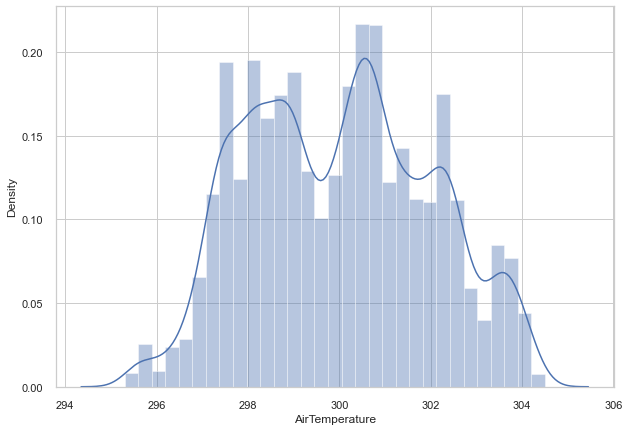

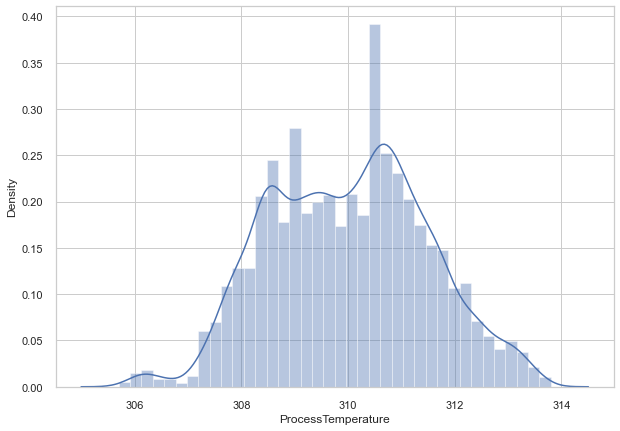

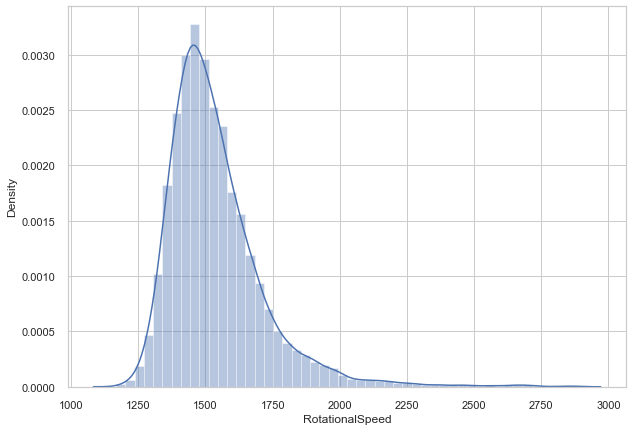

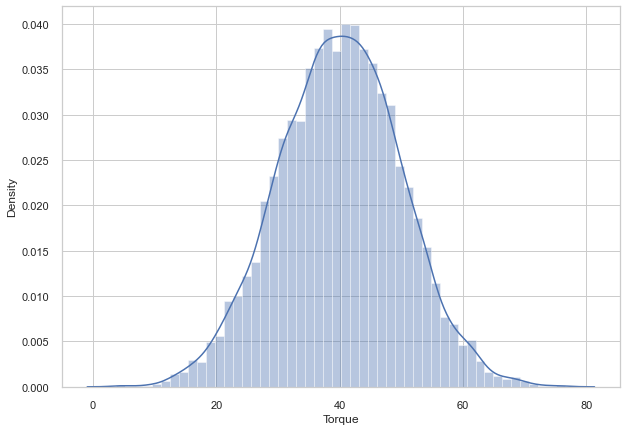

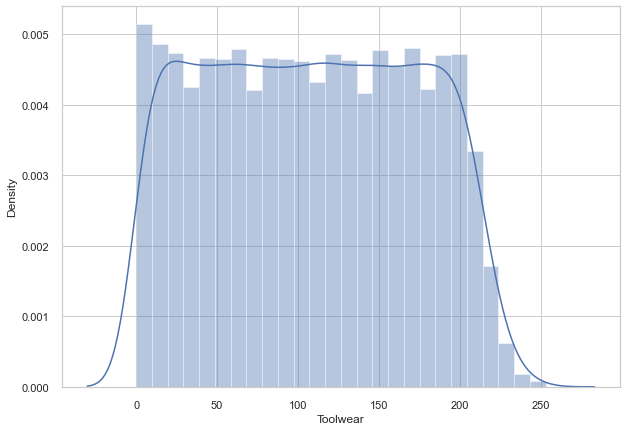

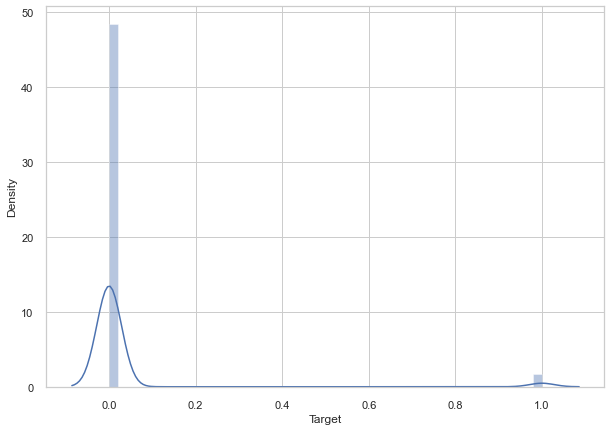

In [25]:
Columns=geNumericCols(Maint_data)

for Cat in Columns:
    
    fig = plt.figure(figsize =(10, 7))
    
    #plt.figure(1) 
    #plt.subplot(121) 
    sns.distplot(Maint_data[Cat], hist=True, kde=True);  
    
    plt.show()

inference: 

      We have observed that 9661 Non-failure classes and  339 Failure- which shows that Data has imbalance of classes. 
      We have observed the 60 % data giving information about L quality, 30 % data giving info about M quality and 10% of High quality.
     consisting of more than 50% percentage failure happening due to below failures
      Heat Dissipation Failure     1.12 of 3.6%
      Power Failure                0.95 of 3.6%
      Overstrain Failure           0.78 0f 3.6%
      The numerical atrributes distributed evenly.

### Bivariate Analysis

In [26]:
def percent_graph(ax):
    
    for p in ax.patches:
        total = float(len(Maint_data))
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width()
        y = p.get_height()
        ax.annotate(percentage, (x, y),ha='center')
    return ax

<AxesSubplot:xlabel='Type', ylabel='count'>

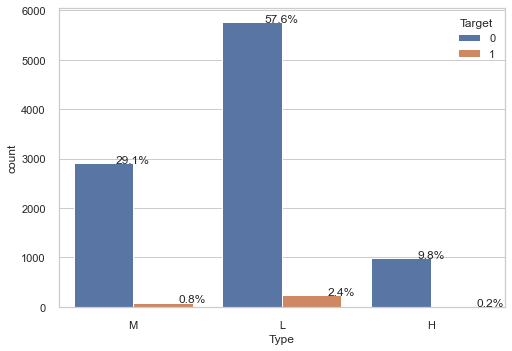

In [27]:
ax=sns.countplot(x = 'Type',data = Maint_data,hue='Target',palette="deep");
percent_graph(ax)

   -  We can see that failure status with respect to the quality of machine
   -  L-2.4% of 60% i.e  57.6% no failure
   - M- 0.8 % of 30% i.e 29.1 % no failure
   - H - 0.2% of 10  i.e 9.8  % no failure

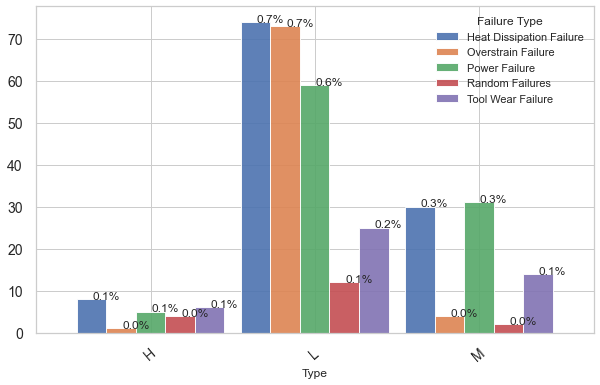

In [28]:
Failure_status=pd.crosstab(Maint_data['Type'],Maint_data['Failure Type'])
Failure_status.drop(['No Failure'],axis=1,inplace=True)
ax=Failure_status.plot(kind="bar", stacked=False, figsize=(10,6),width=0.9,alpha=0.9,fontsize=14)
percent_graph(ax)
plt.xticks(rotation=40)
plt.show()

In [29]:
Failure_status=pd.crosstab([Maint_data['Type'],Maint_data['Target']],Maint_data['Failure Type'])
Failure_status

Failure Type  Heat Dissipation Failure  No Failure  Overstrain Failure  \
Type Target                                                              
H    0                               0         978                   0   
     1                               8           1                   1   
L    0                               0        5753                   0   
     1                              74           4                  73   
M    0                               0        2912                   0   
     1                              30           4                   4   

Failure Type  Power Failure  Random Failures  Tool Wear Failure  
Type Target                                                      
H    0                    0                4                  0  
     1                    5                0                  6  
L    0                    0               12                  0  
     1                   59                0                 25  
M    0                    0                2                  0  
     1                   31                0                 14

From the above table,we can observe that random failure has Target value 0(indicates no failure) 
for All three quality type of machines. 

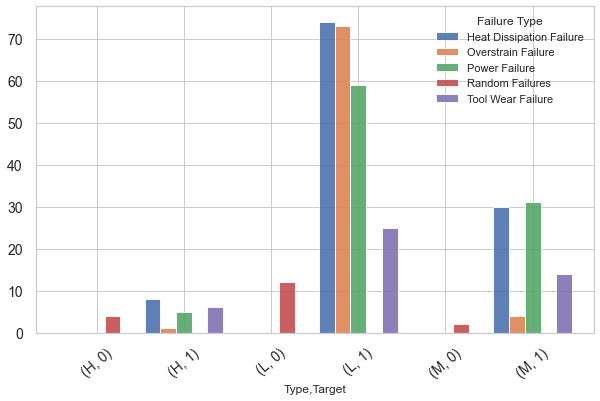

In [30]:
colors_list= ['Grey','Orange','Black']
Failure_status.drop(['No Failure'],axis=1,inplace=True)
ax=Failure_status.plot(kind="bar", stacked=False, figsize=(10,6),width=0.9,alpha=0.9,fontsize=14)
#percent_graph(ax)
plt.xticks(rotation=40)
plt.show()

    From the above graph, we can infer that L quality machines supporting majority of failure. How ever the provided data is imbalance.
    Clearly we can see Heat Dissipation and powerfailure causing majority in all 3 types of machines. how ever overstrain failure adding more failure percentage to L and M quality Equipment.



In [31]:
len(Maint_data._get_numeric_data().columns)

6

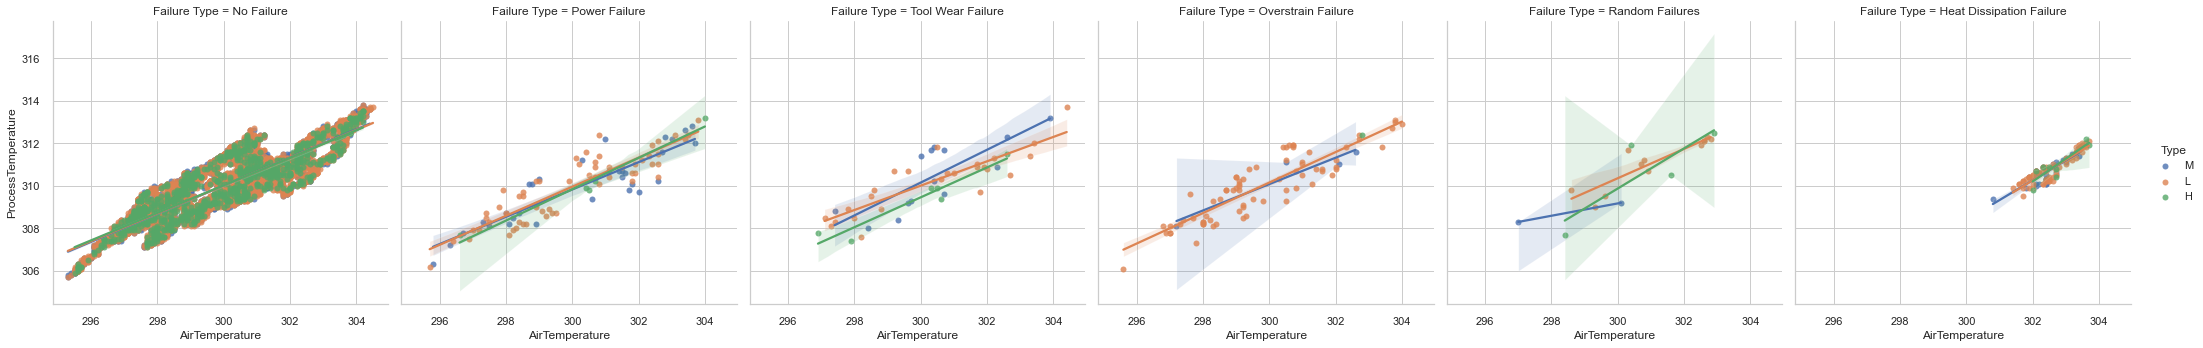

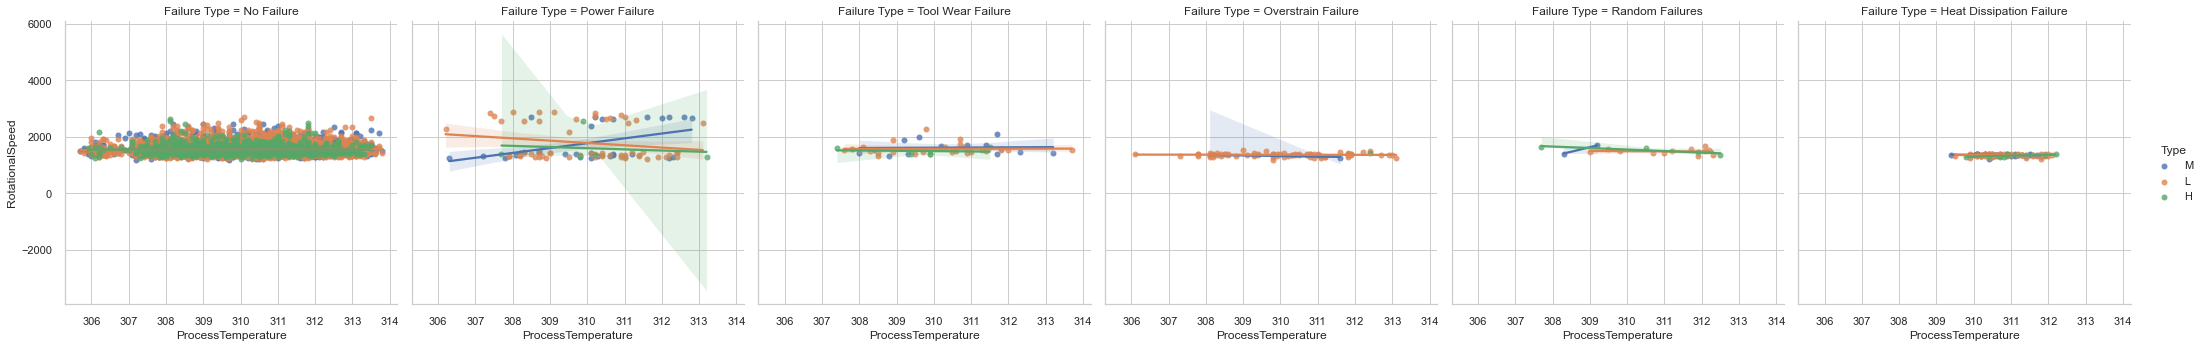

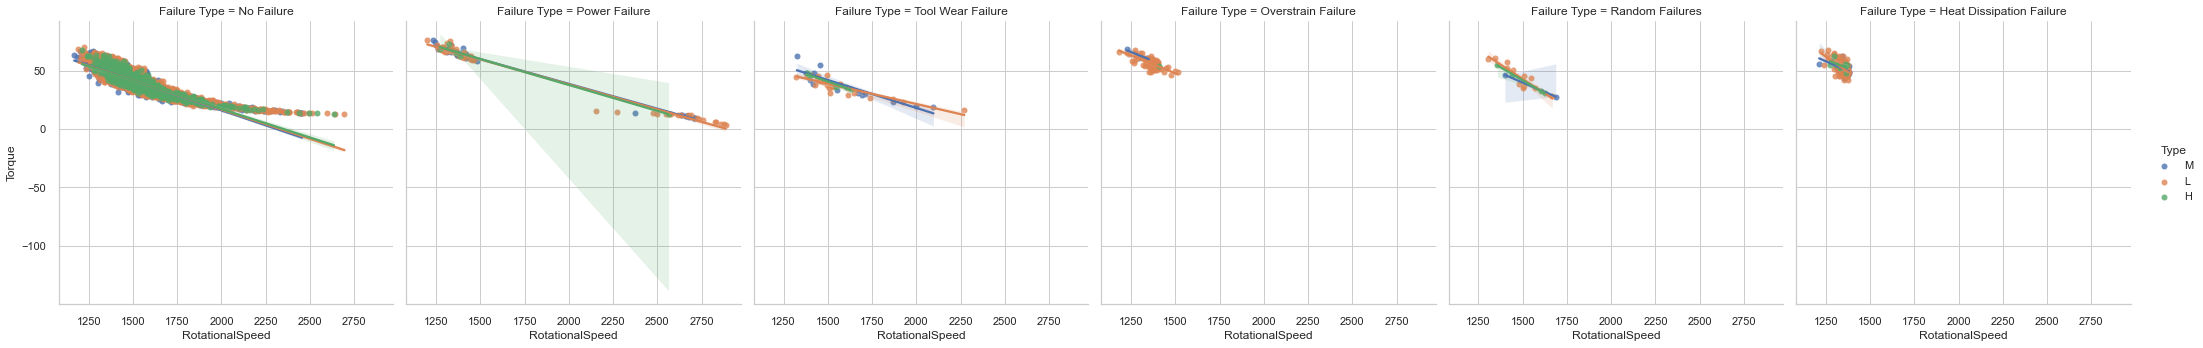

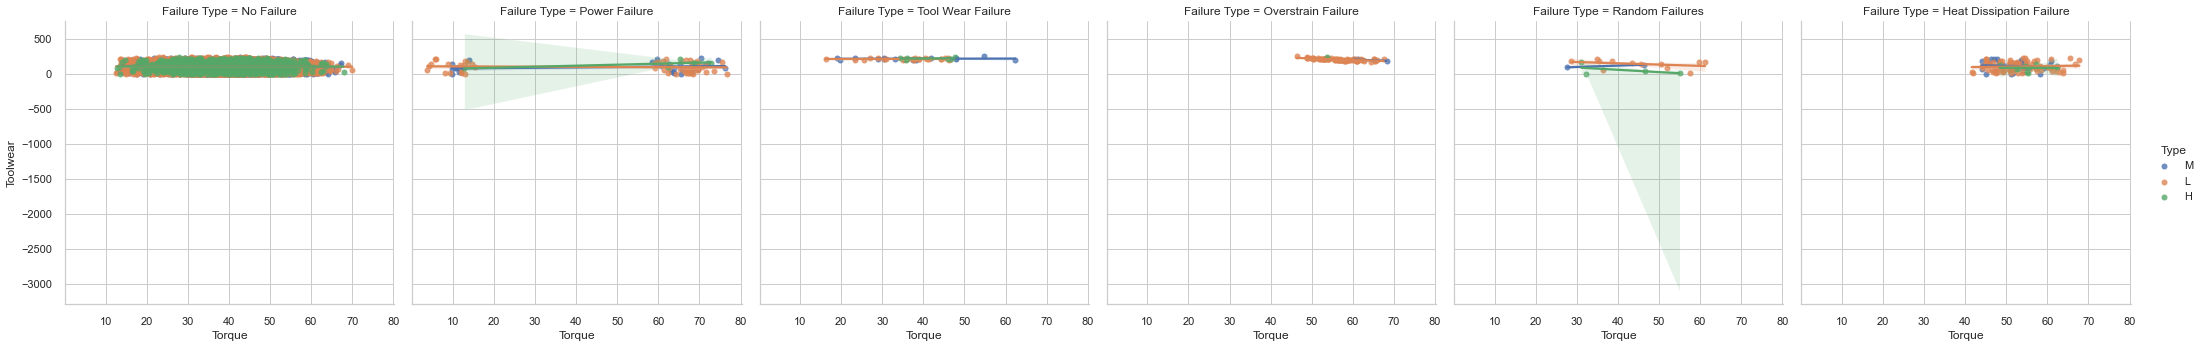

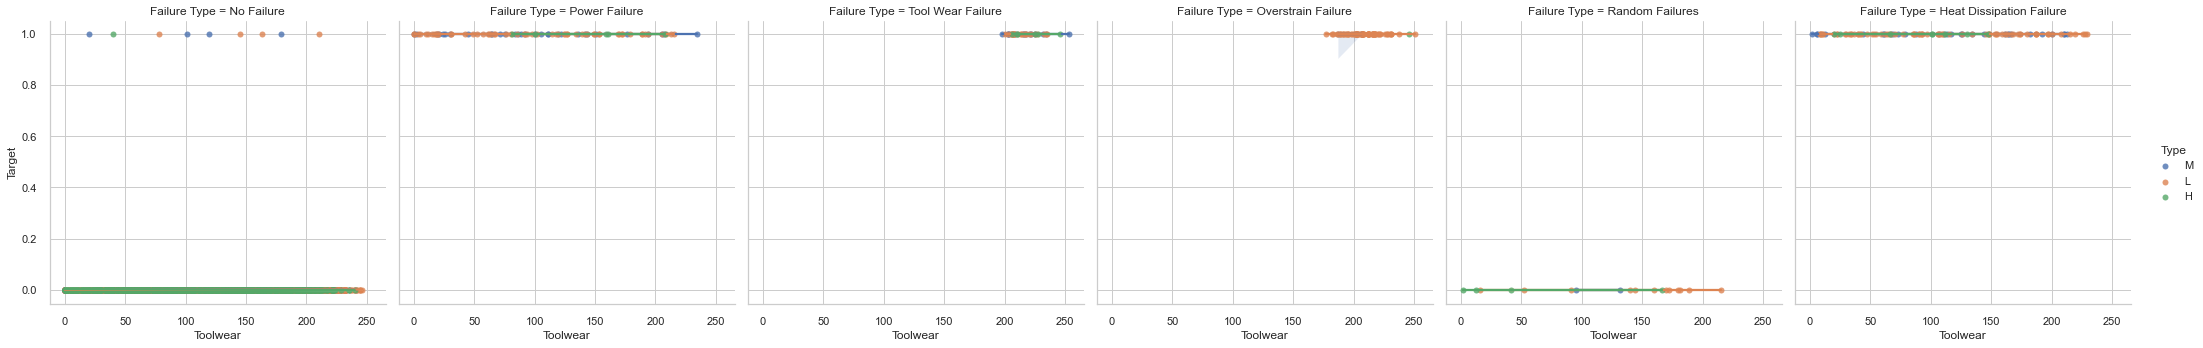

In [32]:
for i in range(len(Maint_data._get_numeric_data().columns)):
    if i != max(np.arange(len(Maint_data._get_numeric_data().columns))):
        sns.lmplot(x = Maint_data._get_numeric_data().columns[i],y = Maint_data._get_numeric_data().columns[i+1], hue="Type", col="Failure Type",data=Maint_data)

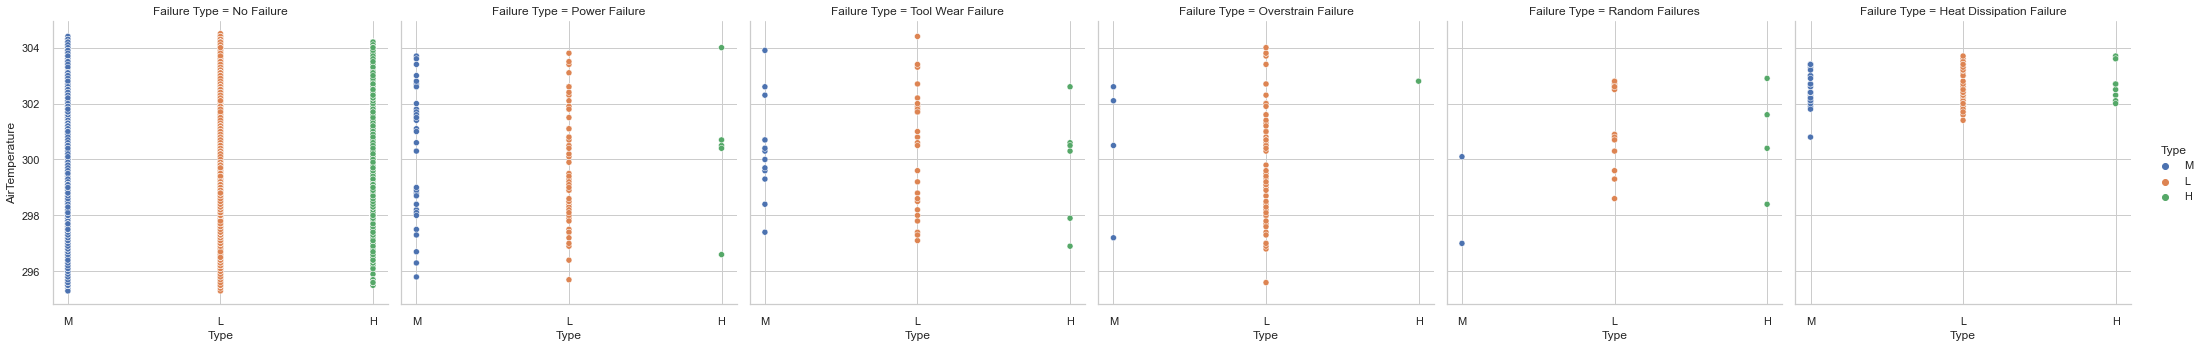

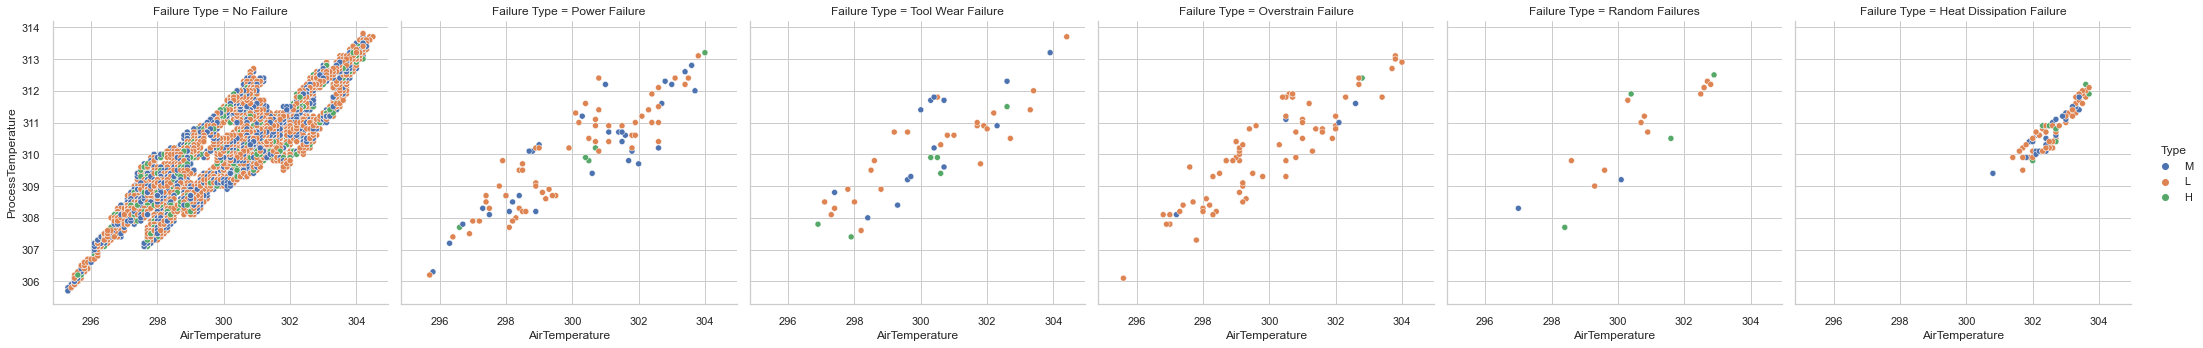

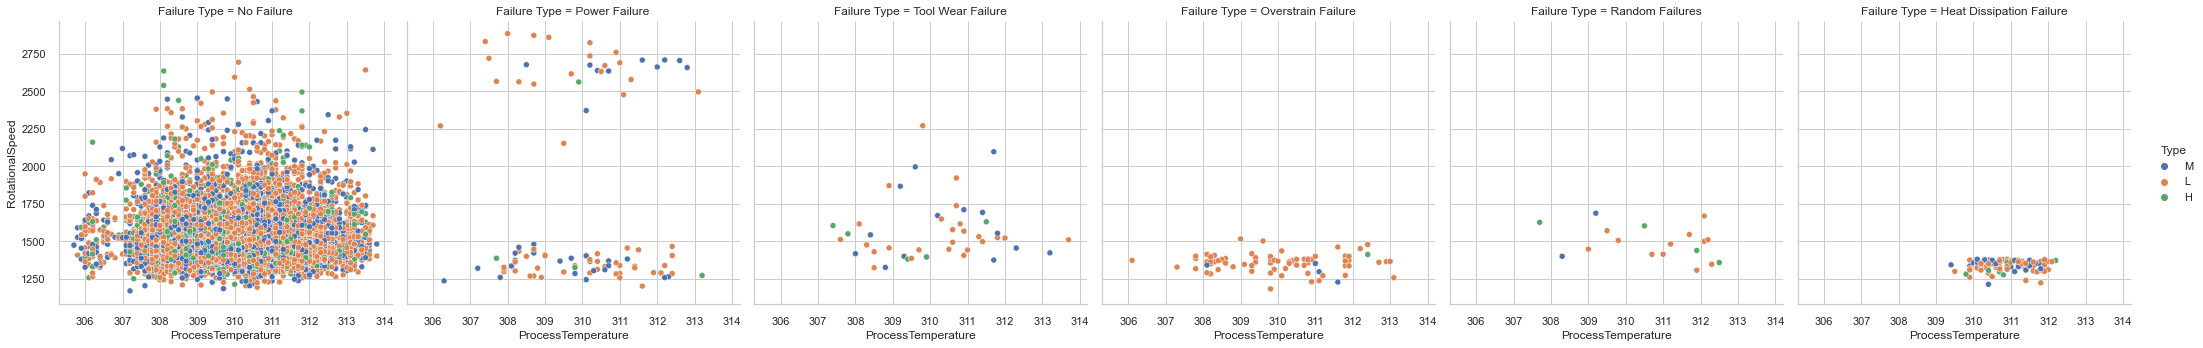

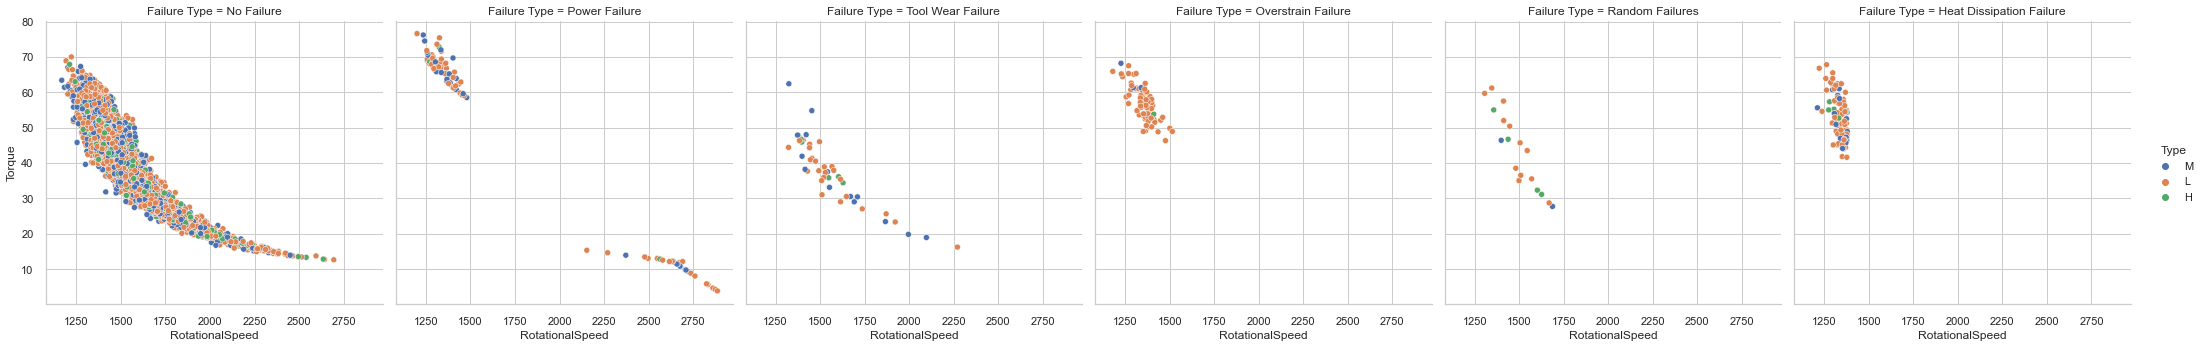

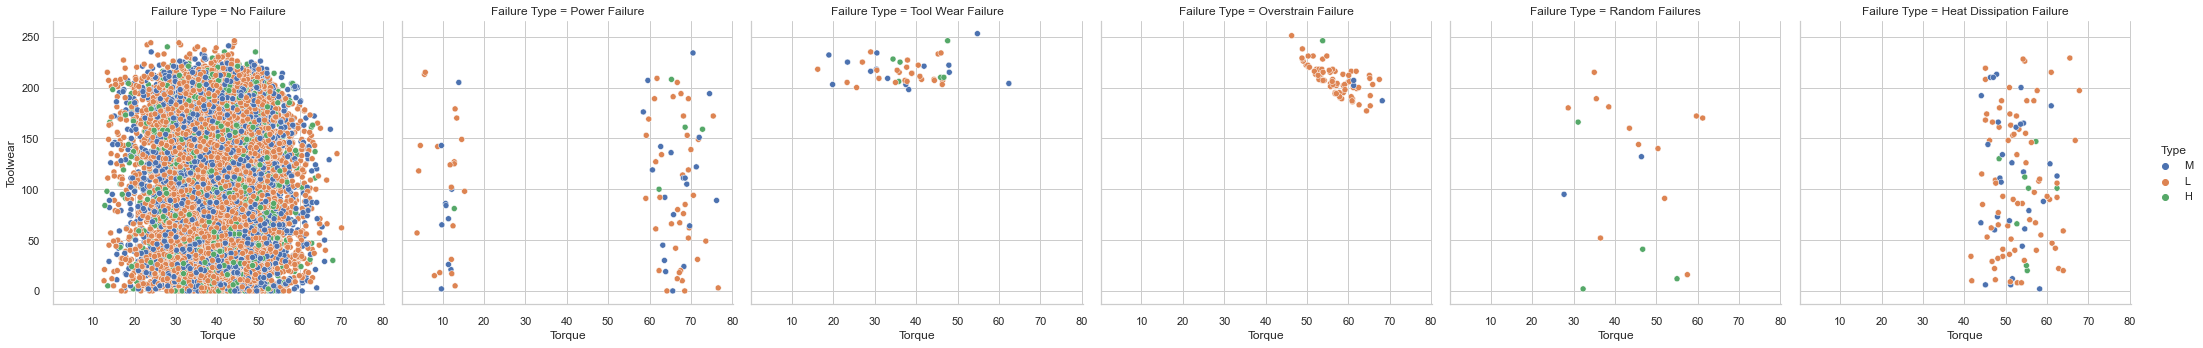

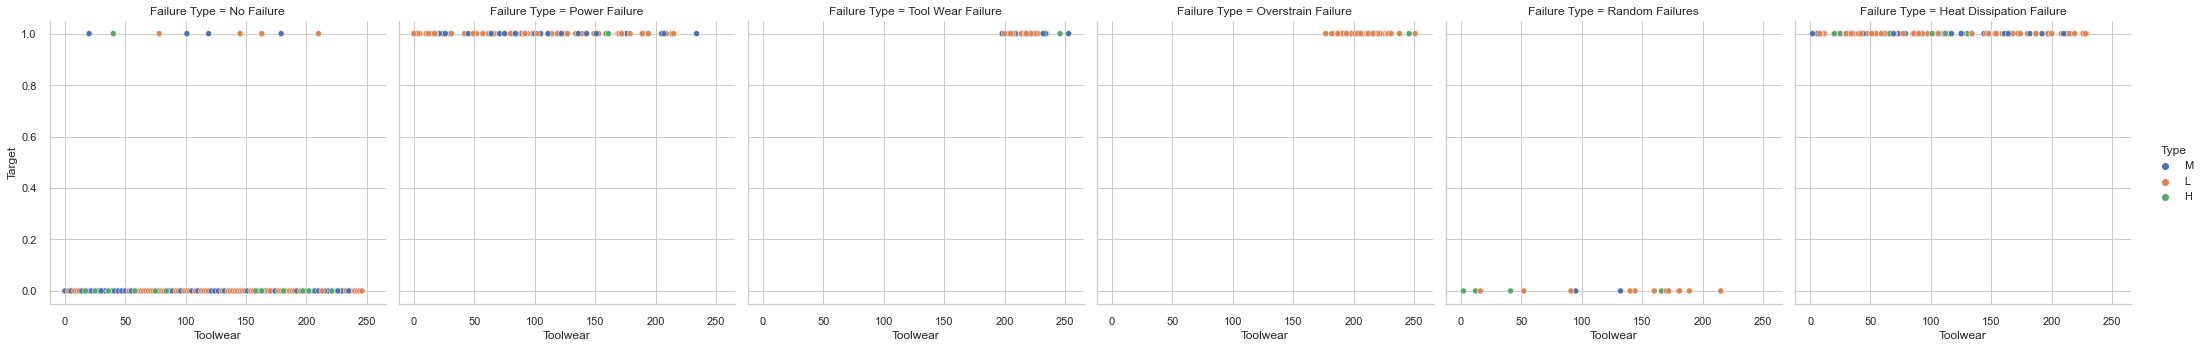

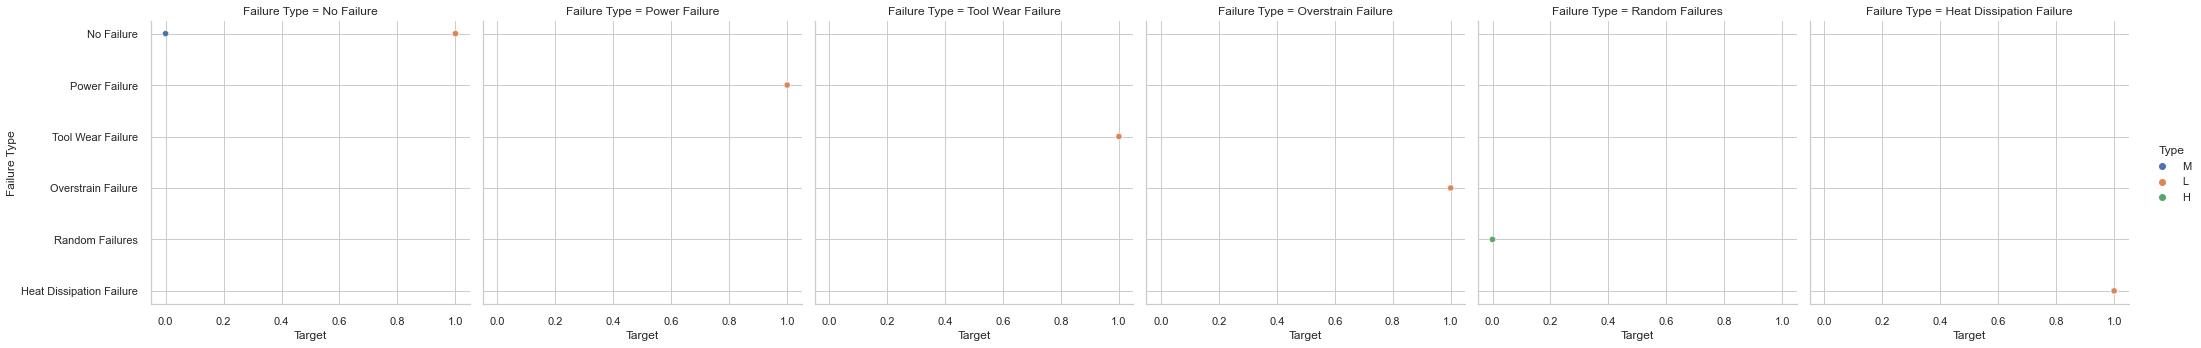

In [33]:
for i in range(len(Maint_data.columns)):
    if i != max(np.arange(len(Maint_data.columns))):
        sns.relplot(x = Maint_data.columns[i],y = Maint_data.columns[i+1], hue="Type", col="Failure Type",data=Maint_data)

In [34]:
def snsInteractive(data, xAxis, yAxis, response):
    f, ax = plt.subplots(figsize=(12, 9))
    sns.scatterplot(data=data, x=xAxis, y=yAxis, palette="deep", legend="full",
                    hue=data[response].tolist())
    plt.show()
    

    return f, ax

def jointplot(data,xAxis,yAxis):
   
    ax = sns.jointplot(data=data, x=xAxis, y=yAxis, palette="deep")
    plt.show()
    
    return ax

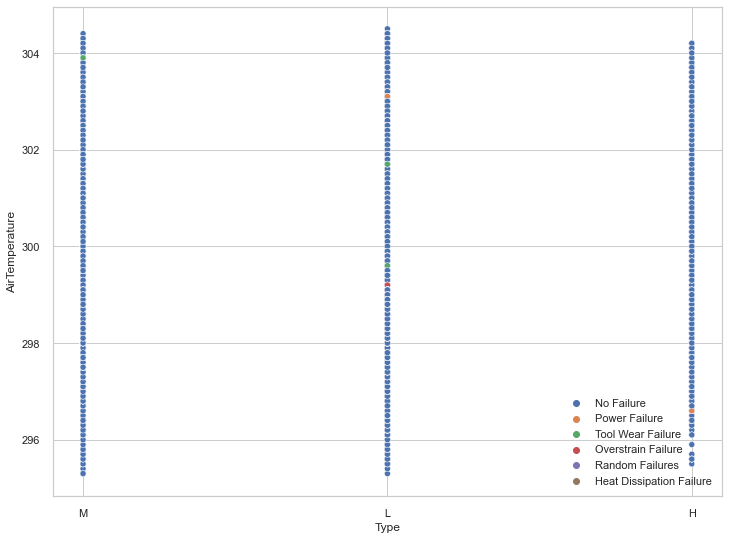

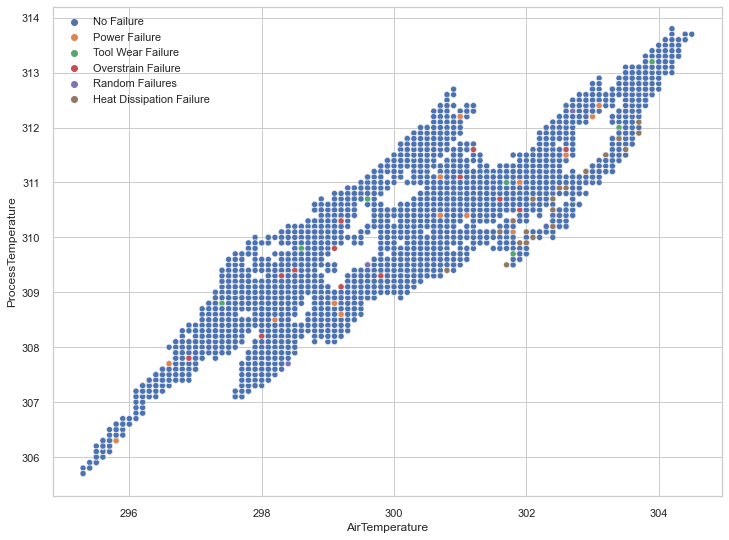

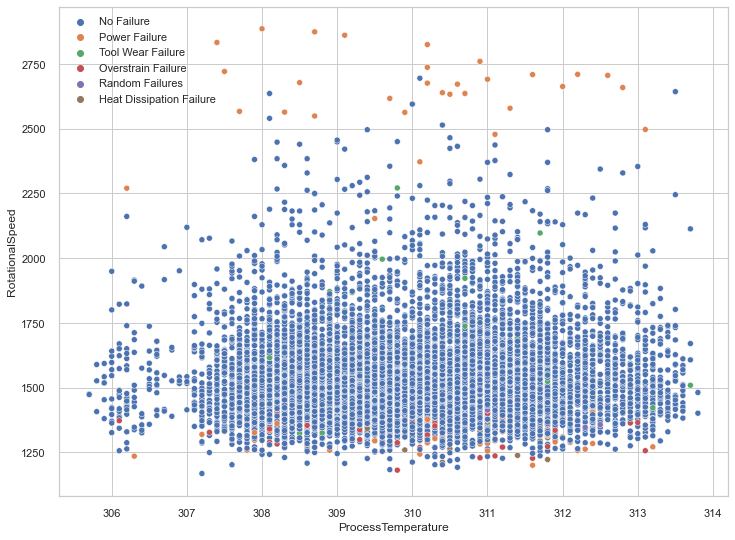

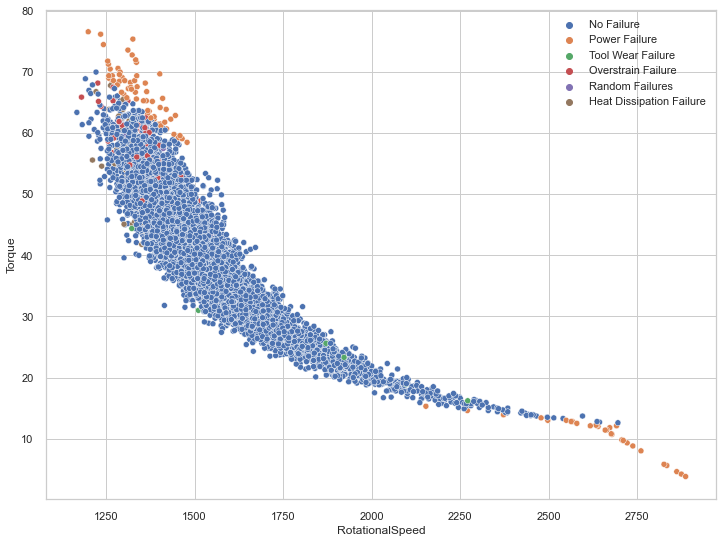

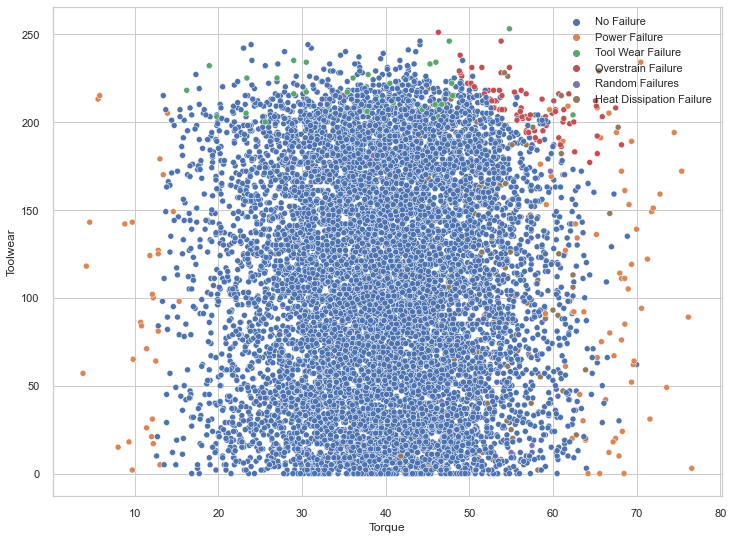

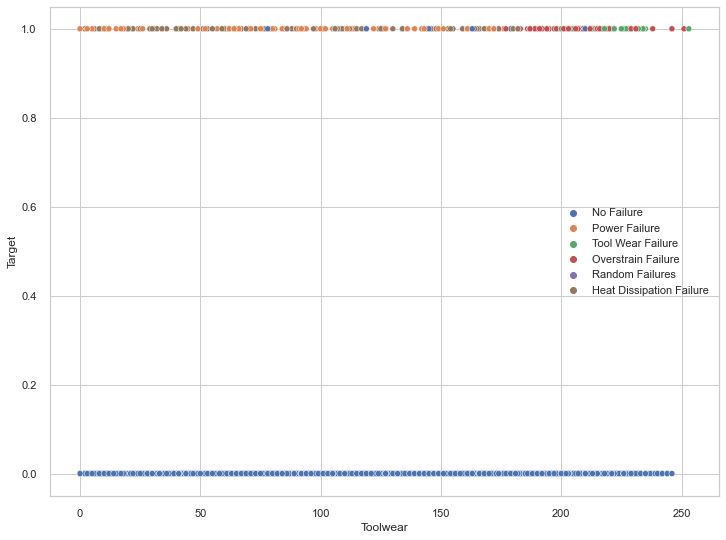

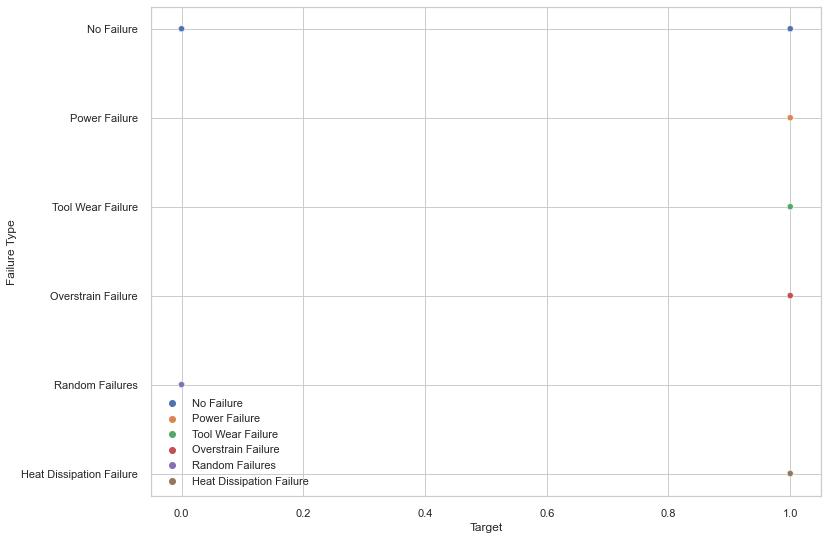

In [35]:
#Numerical scatterplot
for i in range(len(Maint_data.columns)):
    if i != max(np.arange(len(Maint_data.columns))):
        snsInteractive(Maint_data,Maint_data.columns[i],Maint_data.columns[i+1],'Failure Type')
 

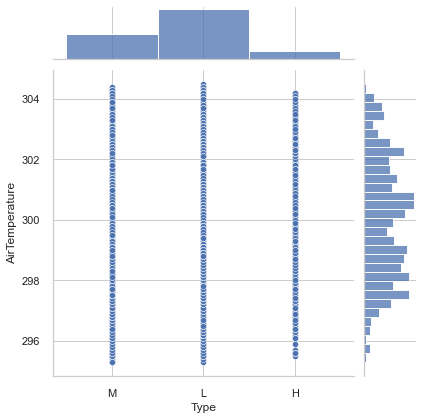

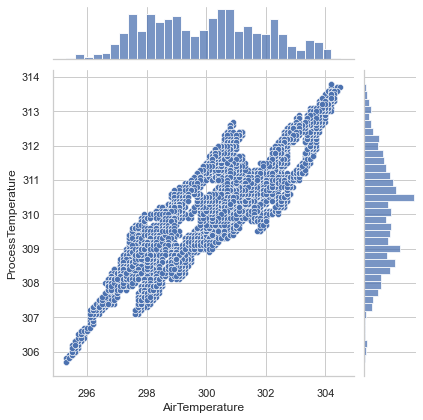

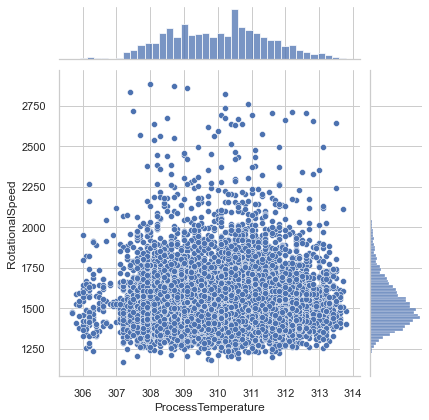

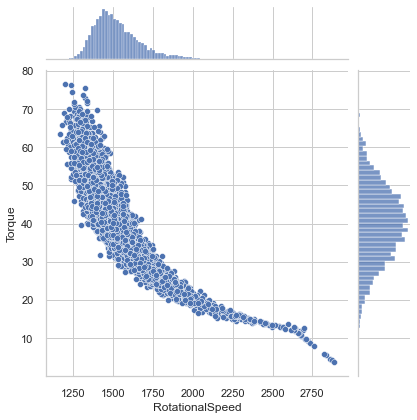

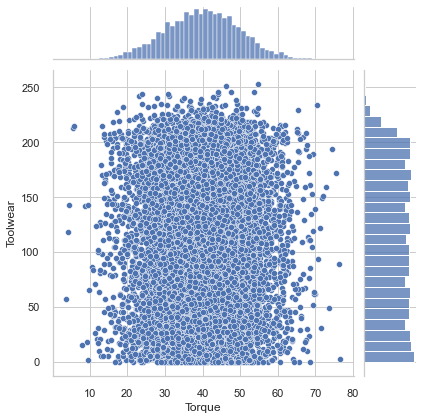

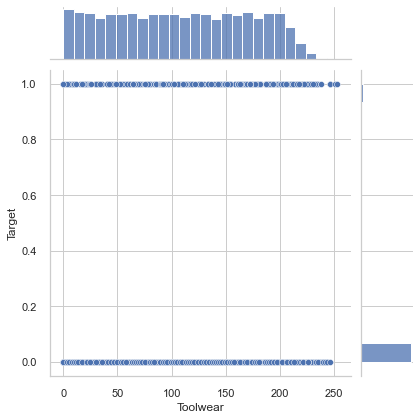

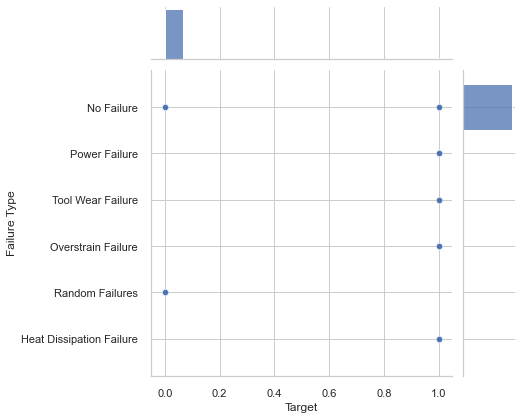

In [36]:
#Joint Plot visualisation
for i in range(len(Maint_data.columns)):
    if i != max(np.arange(len(Maint_data.columns))):
        jointplot(Maint_data,Maint_data.columns[i],Maint_data.columns[i+1])

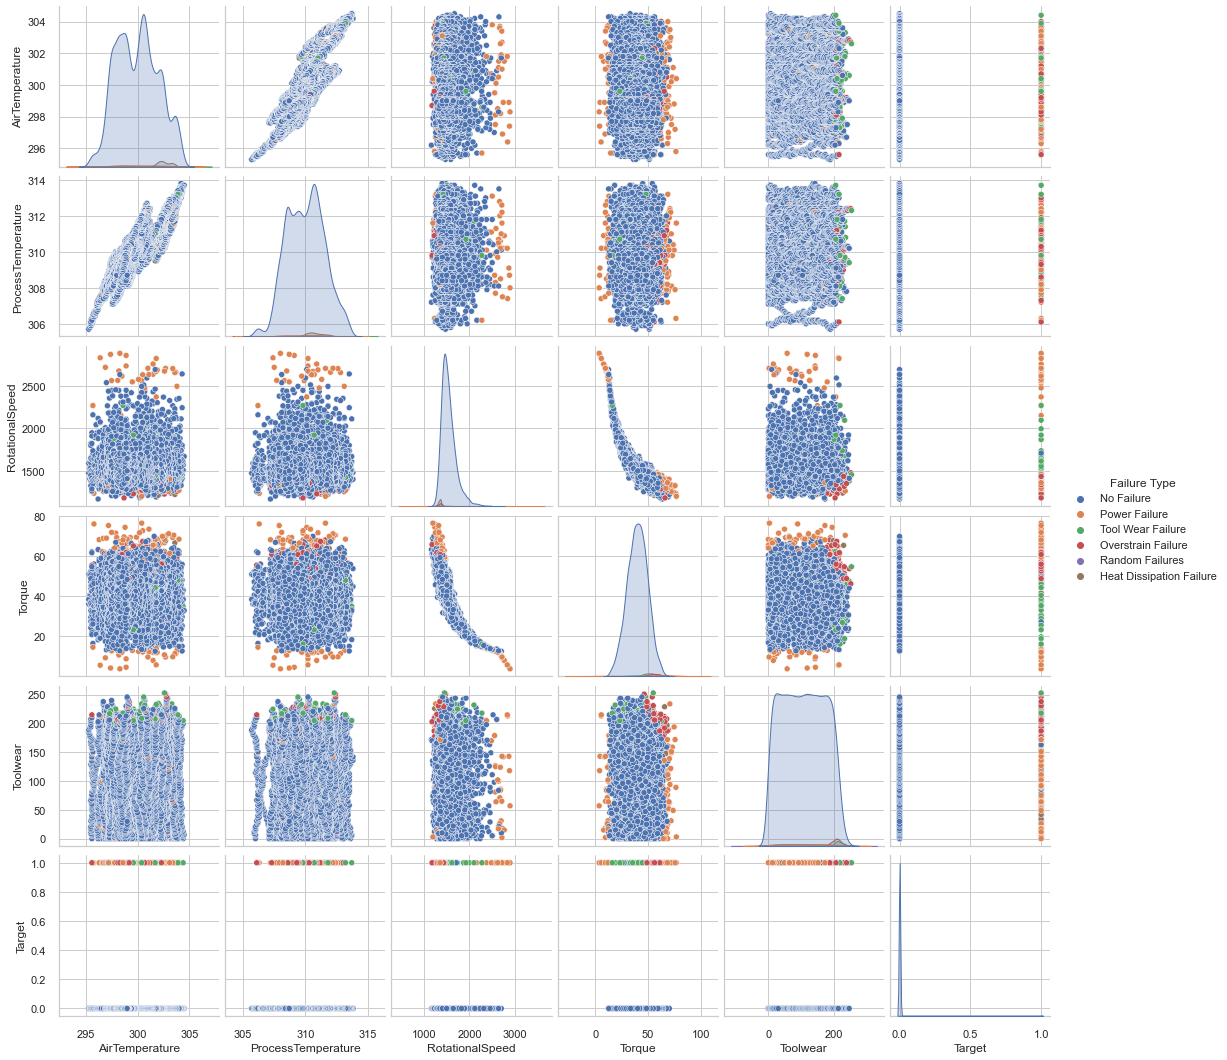

In [37]:
sns.pairplot(Maint_data, hue="Failure Type") 

inference:

    process temparature and air temparature is highly co-related 
    toqrue and rotational speed inversly corelated
    Failure happened above rotational speed 1000

-  Power failure happening when rotational speed > 2500 and totque > 60
-  Overstrain failure is happening L type equipment
   and overstrain failure happening when rotational speed <1500
   and of tool wear and torque exceeds 11,000 minNm for the L product variant (12,000 M, 13,000 H), 
   the process fails due to overstrain

-  Heat Dissipation failure occuring when aritemparature > 301 and process temparature > 309 and 
   rotation speed<1400
-  tool wear failure happening in between 200 t0 250 min

### Co-Relation Visualisation

In [38]:
Corr=Maint_data.corr()
Corr

AirTemperature  ProcessTemperature  RotationalSpeed  \
AirTemperature            1.000000            0.876107         0.022670   
ProcessTemperature        0.876107            1.000000         0.019277   
RotationalSpeed           0.022670            0.019277         1.000000   
Torque                   -0.013778           -0.014061        -0.875027   
Toolwear                  0.013853            0.013488         0.000223   
Target                    0.082556            0.035946        -0.044188   

                      Torque  Toolwear    Target  
AirTemperature     -0.013778  0.013853  0.082556  
ProcessTemperature -0.014061  0.013488  0.035946  
RotationalSpeed    -0.875027  0.000223 -0.044188  
Torque              1.000000 -0.003093  0.191321  
Toolwear           -0.003093  1.000000  0.105448  
Target              0.191321  0.105448  1.000000

<AxesSubplot:>

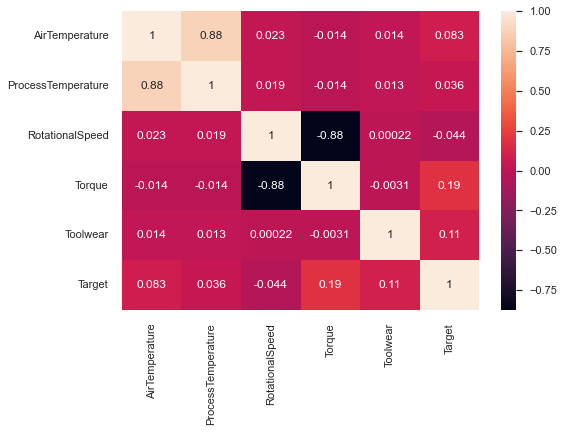

In [39]:
sns.heatmap(Maint_data.corr(),annot=True)

In [40]:
#Correlation with output variable
cor_target = abs(Corr["Target"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.4]
relevant_features

Target    1.0
Name: Target, dtype: float64

-     No attribue co related with Target Variable
-     process temparature and air temparature is highly co-related 
-     toqrue and rotational speed inversly corelated

In [41]:

import sweetviz as sv
rpt = sv.analyze(Maint_data)
rpt.show_html('rpt.html', layout='widescreen', scale='0.7')

                                             |                                             | [  0%]   00:00 ->…

Report rpt.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [42]:
from pandas_profiling import ProfileReport
prof = ProfileReport(Maint_data)
prof.to_file(output_file='output.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

### Encoding

In [43]:
#categorical encoding
def labelEncoder(data):
    d1 = data.copy()
    columns=d1.select_dtypes(include=["object","category"]).columns
    for i in CategoricCols:
        le = LabelEncoder()
        d1[i] = le.fit_transform(d1[i])
    return d1

def get_dummies(data):
    d1 = data.copy()
    #columns=d1.select_dtypes(include=["object","category"]).columns
    for i in CategoricCols:
        d1 = pd.get_dummies(d1)
    return d1

In [44]:
Labeled_Data=labelEncoder(Maint_data)

In [45]:
Labeled_Data.head()

Type  AirTemperature  ProcessTemperature  RotationalSpeed  Torque  \
0     2           298.1               308.6             1551    42.8   
1     1           298.2               308.7             1408    46.3   
2     1           298.1               308.5             1498    49.4   
3     1           298.2               308.6             1433    39.5   
4     1           298.2               308.7             1408    40.0   

   Toolwear  Target  Failure Type  
0         0       0             1  
1         3       0             1  
2         5       0             1  
3         7       0             1  
4         9       0             1

In [46]:
Labeled_Data['Failure Type'].unique()

array([1, 3, 5, 2, 4, 0])

In [47]:
dummy_Encoded_Data=get_dummies(Maint_data)

In [48]:
dummy_Encoded_Data.head()

AirTemperature  ProcessTemperature  RotationalSpeed  Torque  Toolwear  \
0           298.1               308.6             1551    42.8         0   
1           298.2               308.7             1408    46.3         3   
2           298.1               308.5             1498    49.4         5   
3           298.2               308.6             1433    39.5         7   
4           298.2               308.7             1408    40.0         9   

   Target  Type_H  Type_L  Type_M  Failure Type_Heat Dissipation Failure  \
0       0       0       0       1                                      0   
1       0       0       1       0                                      0   
2       0       0       1       0                                      0   
3       0       0       1       0                                      0   
4       0       0       1       0                                      0   

   Failure Type_No Failure  Failure Type_Overstrain Failure  \
0                        1                                0   
1                        1                                0   
2                        1                                0   
3                        1                                0   
4                        1                                0   

   Failure Type_Power Failure  Failure Type_Random Failures  \
0                           0                             0   
1                           0                             0   
2                           0                             0   
3                           0                             0   
4                           0                             0   

   Failure Type_Tool Wear Failure  
0                               0  
1                               0  
2                               0  
3                               0  
4                               0

In [49]:
dummy_Encoded_Data.columns

Index(['AirTemperature', 'ProcessTemperature', 'RotationalSpeed', 'Torque',
       'Toolwear', 'Target', 'Type_H', 'Type_L', 'Type_M',
       'Failure Type_Heat Dissipation Failure', 'Failure Type_No Failure',
       'Failure Type_Overstrain Failure', 'Failure Type_Power Failure',
       'Failure Type_Random Failures', 'Failure Type_Tool Wear Failure'],
      dtype='object')

### Feature Engineering

In [50]:
def createBin(data, numericCols, binNumber=4):
    d1 = data.copy()
    for i in numericCols[0:len(numericCols)]:
        bins = np.linspace(d1[i].min(), d1[i].max(), binNumber)
        d1[i + "Bin"] = pd.cut(d1[i], bins, precision=1, include_lowest=True, right=True)
    return d1

def createCategoryPct(data, categoricalCols):
    d1 = data.copy()
    length = len(d1)
    for i in categoricalCols[0:len(categoricalCols)]:
        d1[i + 'Pct'] = (d1[i].groupby(d1[i]).transform('count')) * 100 / length
    return d1
 

In [51]:
BinData=createBin(Maint_data,NumericCols)

In [52]:
BinData.head()

Type  AirTemperature  ProcessTemperature  RotationalSpeed  Torque  Toolwear  \
0    M           298.1               308.6             1551    42.8         0   
1    L           298.2               308.7             1408    46.3         3   
2    L           298.1               308.5             1498    49.4         5   
3    L           298.2               308.6             1433    39.5         7   
4    L           298.2               308.7             1408    40.0         9   

   Target Failure Type AirTemperatureBin ProcessTemperatureBin  \
0       0   No Failure    (295.2, 298.4]        (308.4, 311.1]   
1       0   No Failure    (295.2, 298.4]        (308.4, 311.1]   
2       0   No Failure    (295.2, 298.4]        (308.4, 311.1]   
3       0   No Failure    (295.2, 298.4]        (308.4, 311.1]   
4       0   No Failure    (295.2, 298.4]        (308.4, 311.1]   

  RotationalSpeedBin     TorqueBin   ToolwearBin    TargetBin  
0   (1167.9, 1740.7]  (28.1, 52.3]  (-0.1, 84.3]  (-0.1, 0.3]  
1   (1167.9, 1740.7]  (28.1, 52.3]  (-0.1, 84.3]  (-0.1, 0.3]  
2   (1167.9, 1740.7]  (28.1, 52.3]  (-0.1, 84.3]  (-0.1, 0.3]  
3   (1167.9, 1740.7]  (28.1, 52.3]  (-0.1, 84.3]  (-0.1, 0.3]  
4   (1167.9, 1740.7]  (28.1, 52.3]  (-0.1, 84.3]  (-0.1, 0.3]

In [53]:
BinData.dtypes

Type                       object
AirTemperature            float64
ProcessTemperature        float64
RotationalSpeed             int64
Torque                    float64
Toolwear                    int64
Target                      int64
Failure Type               object
AirTemperatureBin        category
ProcessTemperatureBin    category
RotationalSpeedBin       category
TorqueBin                category
ToolwearBin              category
TargetBin                category
dtype: object

C:\Users\sunil\AppData\Local\Temp/ipykernel_11196/1197489009.py:6: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


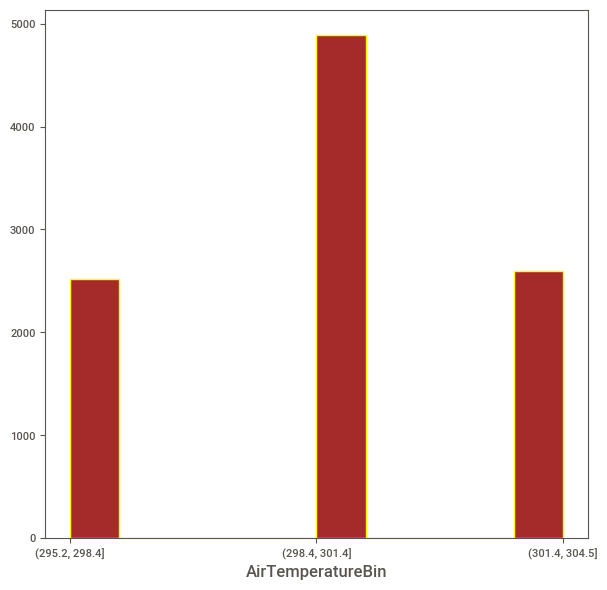

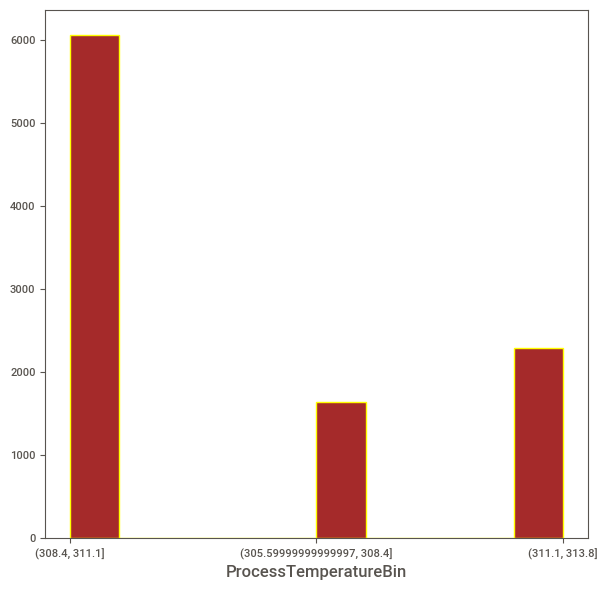

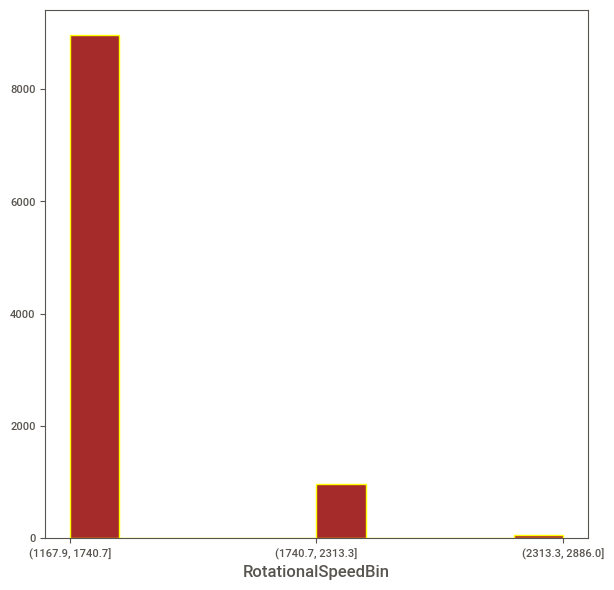

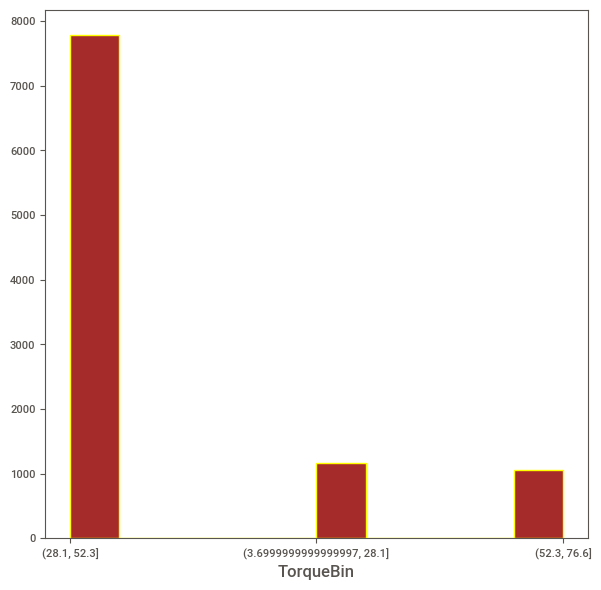

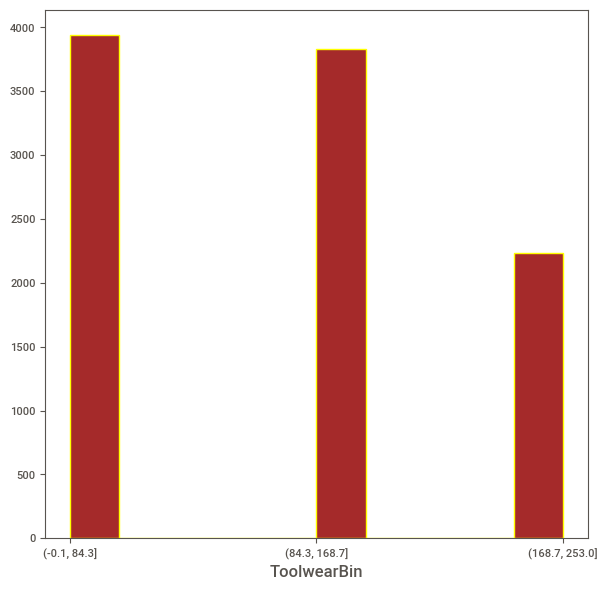

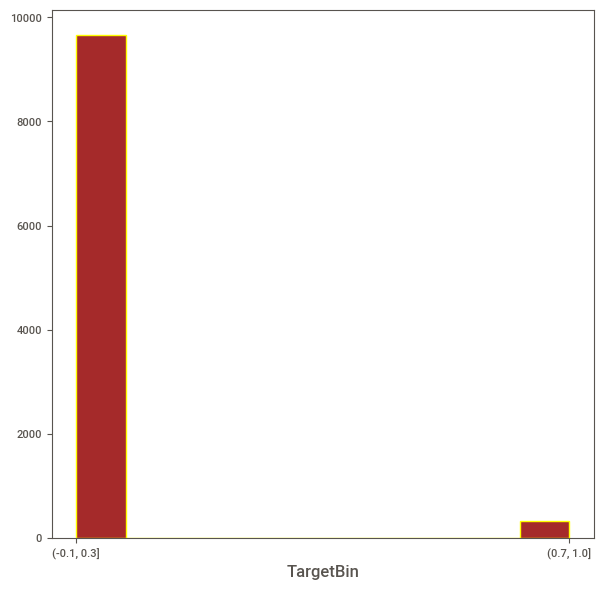

In [54]:
Binned_Columns = ['AirTemperatureBin','ProcessTemperatureBin','RotationalSpeedBin','TorqueBin','ToolwearBin','TargetBin']
for Cat in Binned_Columns:
    fig = plt.figure(figsize =(7, 7))
    plt.hist(BinData[Cat].astype(str),edgecolor="yellow", color="brown")
    plt.xlabel(Cat)
    plt.show()

C:\Users\sunil\AppData\Local\Temp/ipykernel_11196/1231490245.py:4: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()
C:\Users\sunil\AppData\Local\Temp/ipykernel_11196/1231490245.py:4: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()
C:\Users\sunil\AppData\Local\Temp/ipykernel_11196/1231490245.py:4: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()
C:\Users\sunil\AppData\Local\Temp/ipykernel_11196/1231490245.py:4: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()
C:\Users\sunil\AppData\Local\Temp/ipykernel_11196/1231490245.py:4: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()
C:\Users\sunil\AppData\Local\Temp/ipykernel_11196/1231490245.py:4: UserWarning: Matpl

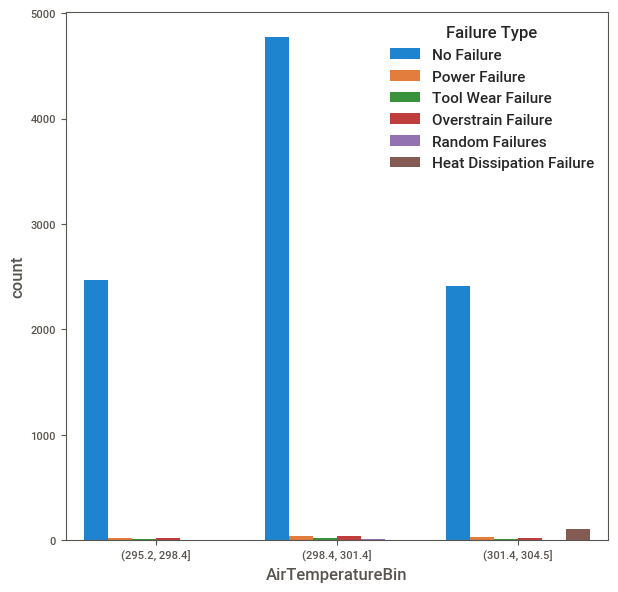

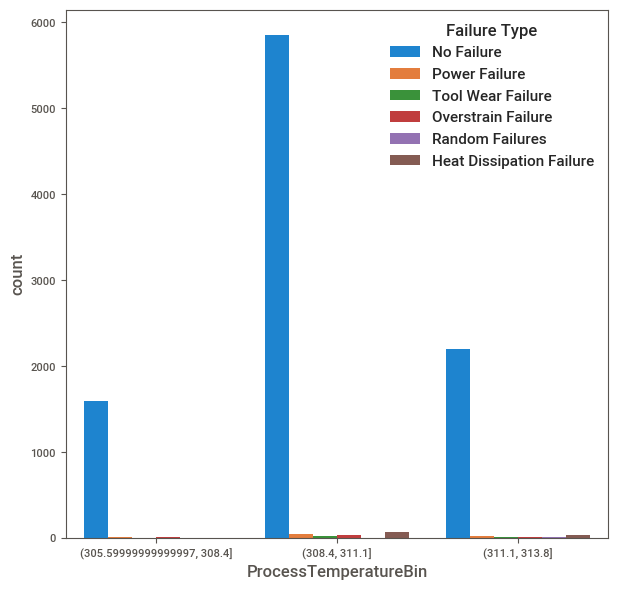

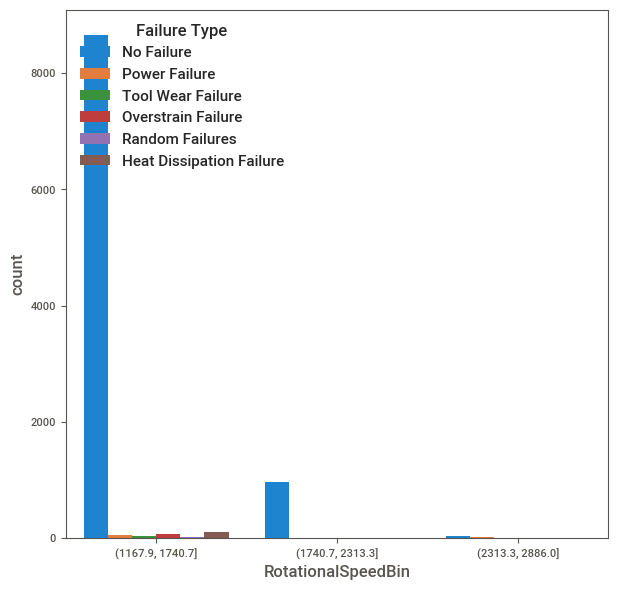

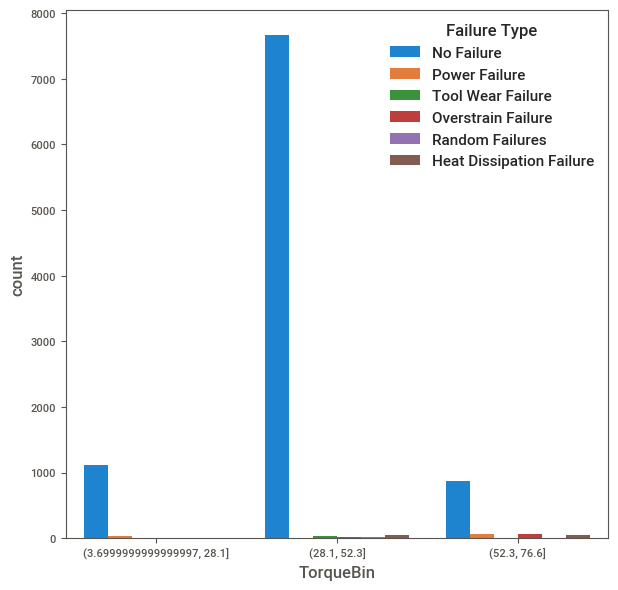

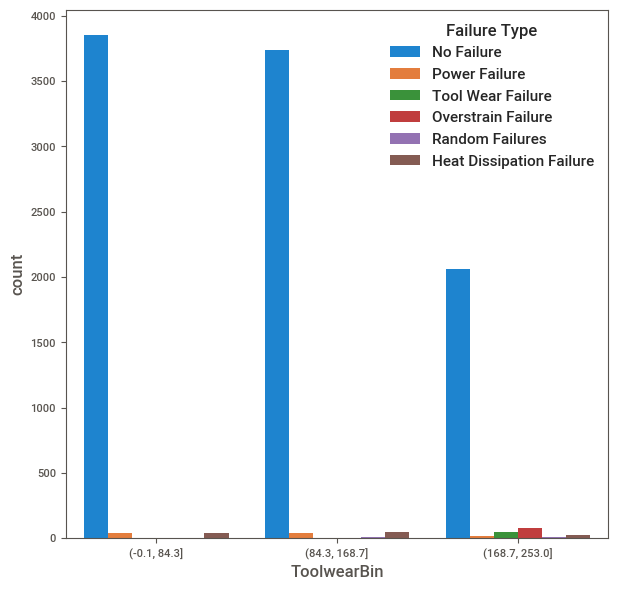

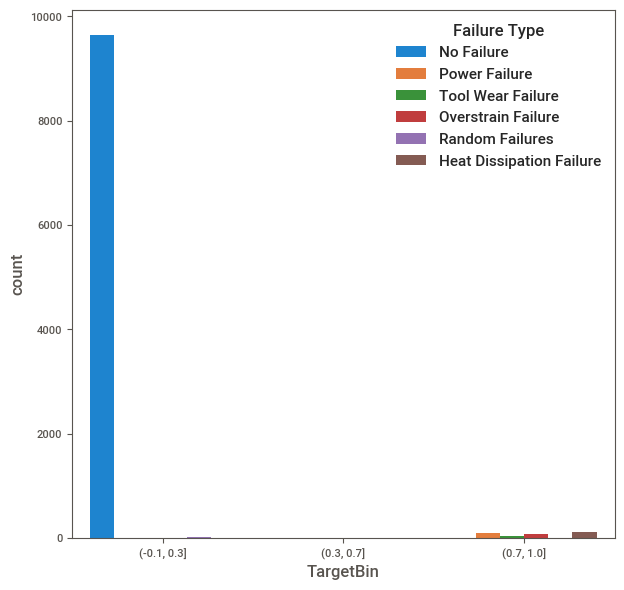

In [55]:
for Cat in Binned_Columns:
    fig = plt.figure(figsize =(7, 7))
    sns.countplot(x=BinData[Cat],hue="Failure Type",data=BinData)
    plt.show()

We created bins manually and observe range of bin where the failure  of equipment occured

In [56]:
CategoryPctData=createCategoryPct(Maint_data, CategoricCols)

In [57]:
CategoryPctData.head()

Type  AirTemperature  ProcessTemperature  RotationalSpeed  Torque  Toolwear  \
0    M           298.1               308.6             1551    42.8         0   
1    L           298.2               308.7             1408    46.3         3   
2    L           298.1               308.5             1498    49.4         5   
3    L           298.2               308.6             1433    39.5         7   
4    L           298.2               308.7             1408    40.0         9   

   Target Failure Type  TypePct  Failure TypePct  
0       0   No Failure    29.97            96.52  
1       0   No Failure    60.00            96.52  
2       0   No Failure    60.00            96.52  
3       0   No Failure    60.00            96.52  
4       0   No Failure    60.00            96.52

C:\Users\sunil\AppData\Local\Temp/ipykernel_11196/505070660.py:3: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  sns.barplot(x='Failure Type',y = 'Failure TypePct',data = CategoryPctData, ax = axs[0],palette="deep").set_xticklabels(Items,Rotation=90);
C:\Users\sunil\AppData\Local\Temp/ipykernel_11196/505070660.py:4: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  sns.barplot(x='Failure Type',y = 'Failure TypePct',data = CategoryPctData, hue='Type',ax = axs[1],palette="deep").set_xticklabels(Items,Rotation=90);


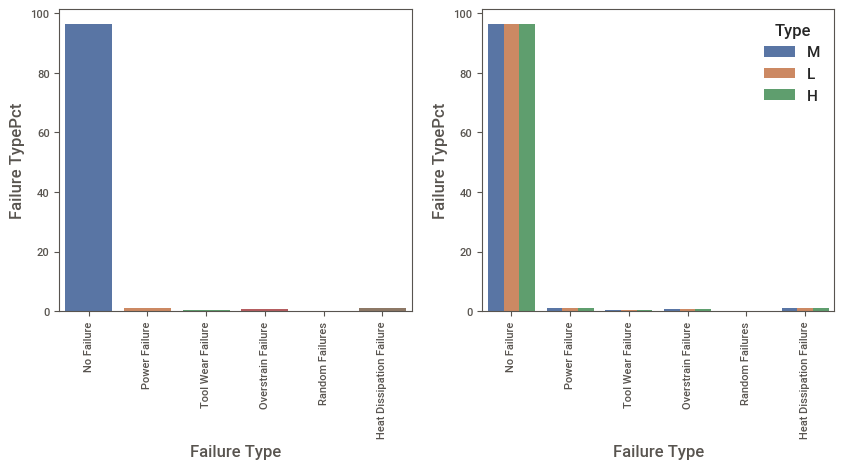

In [58]:
fig, axs = plt.subplots(1, 2, figsize=(10,4))
Items=CategoryPctData['Failure Type'].unique()
sns.barplot(x='Failure Type',y = 'Failure TypePct',data = CategoryPctData, ax = axs[0],palette="deep").set_xticklabels(Items,Rotation=90);
sns.barplot(x='Failure Type',y = 'Failure TypePct',data = CategoryPctData, hue='Type',ax = axs[1],palette="deep").set_xticklabels(Items,Rotation=90);
#sns.countplot(x = 'Target', data = CategoryPctData, ax = axs[1],palette="deep")

<AxesSubplot:xlabel='Failure TypePct', ylabel='count'>

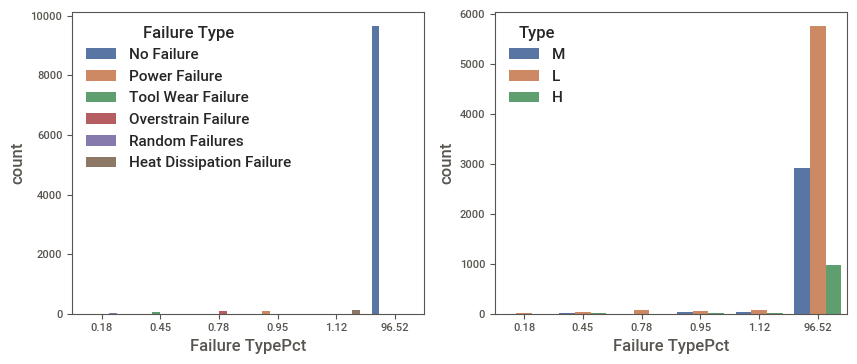

In [59]:
fig, axs = plt.subplots(1, 2, figsize=(10,4))
Items=CategoryPctData['Failure Type'].unique()
sns.countplot(x = 'Failure TypePct',data = CategoryPctData,hue='Failure Type', ax = axs[0],palette="deep")
sns.countplot(x = 'Failure TypePct',data = CategoryPctData, hue='Type',ax = axs[1],palette="deep")
#sns.countplot(x = 'Target', data = CategoryPctData, ax = axs[1],palette="deep")

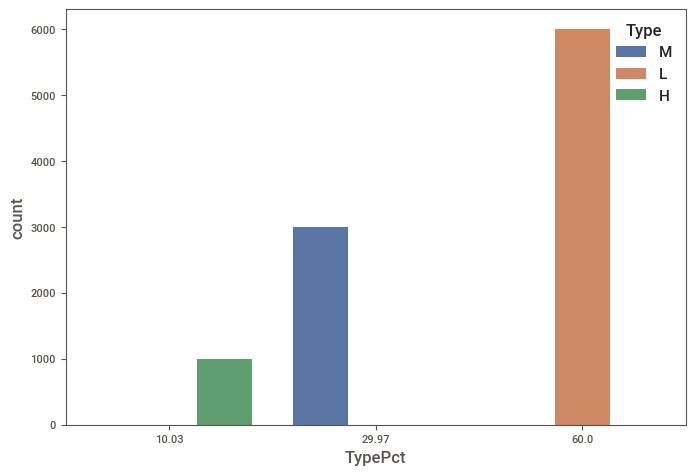

In [60]:
#sns.countplot(x = 'Failure TypePct',data = CategoryPctData,hue='Failure Type',palette="deep");

sns.countplot(x = 'TypePct',data = CategoryPctData,hue='Type',palette="deep");


    We have created dataset to represent each categorical attribute percentage with overall data. here are observed values.
    Quality of equipment:
    L -60.0
    M - 29.97
    H -10.03
    
   -  We can see that failure status with respect to the quality of machine
   -  L-2.4% of 60% i.e  57.6% no failure
   - M- 0.8 % of 30% i.e 29.1 % no failure
   - H - 0.2% of 10  i.e 9.8  % no failure

### OutLier Detection 

C:\Users\sunil\AppData\Local\Temp/ipykernel_11196/2410578876.py:8: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()
C:\Users\sunil\AppData\Local\Temp/ipykernel_11196/2410578876.py:8: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()
C:\Users\sunil\AppData\Local\Temp/ipykernel_11196/2410578876.py:8: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()
C:\Users\sunil\AppData\Local\Temp/ipykernel_11196/2410578876.py:8: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()
C:\Users\sunil\AppData\Local\Temp/ipykernel_11196/2410578876.py:8: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()
C:\Users\sunil\AppData\Local\Temp/ipykernel_11196/2410578876.py:8: UserWarning: Matpl

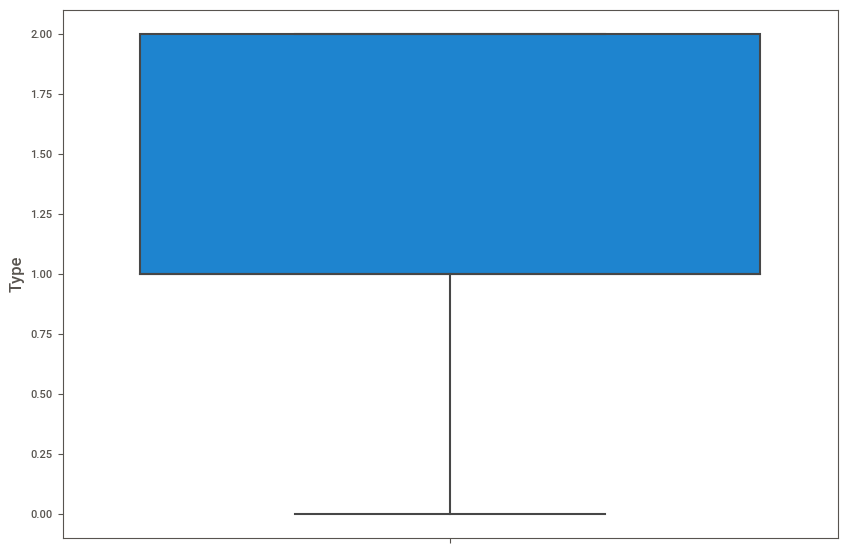

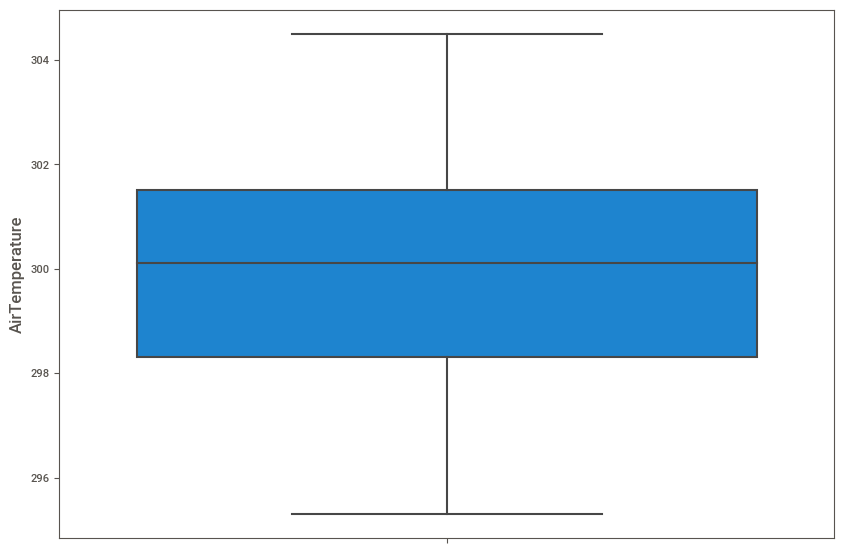

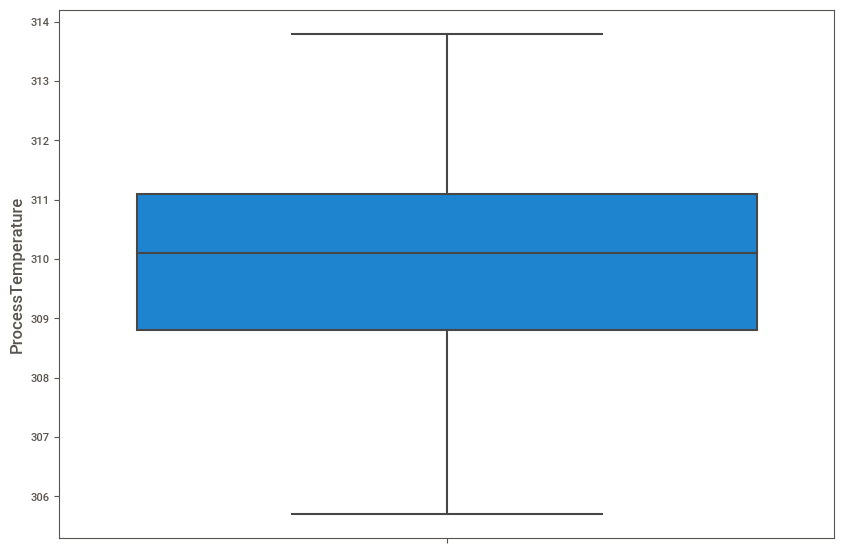

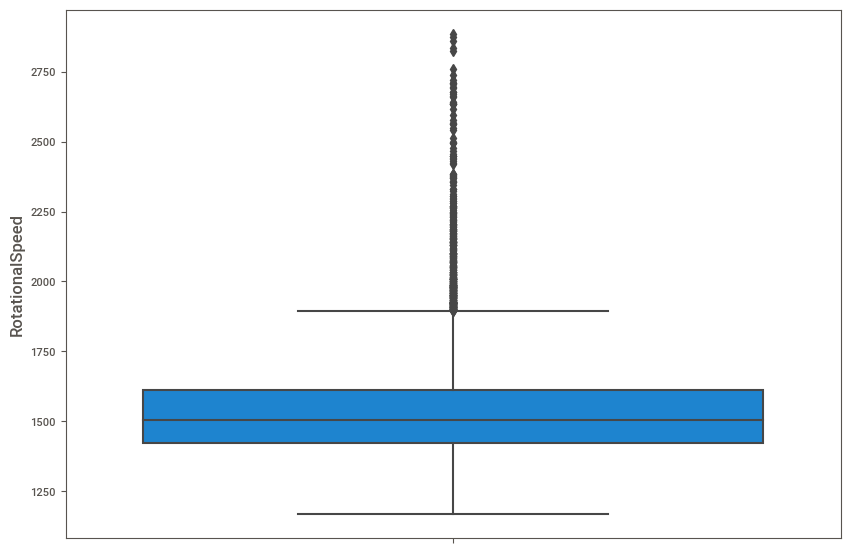

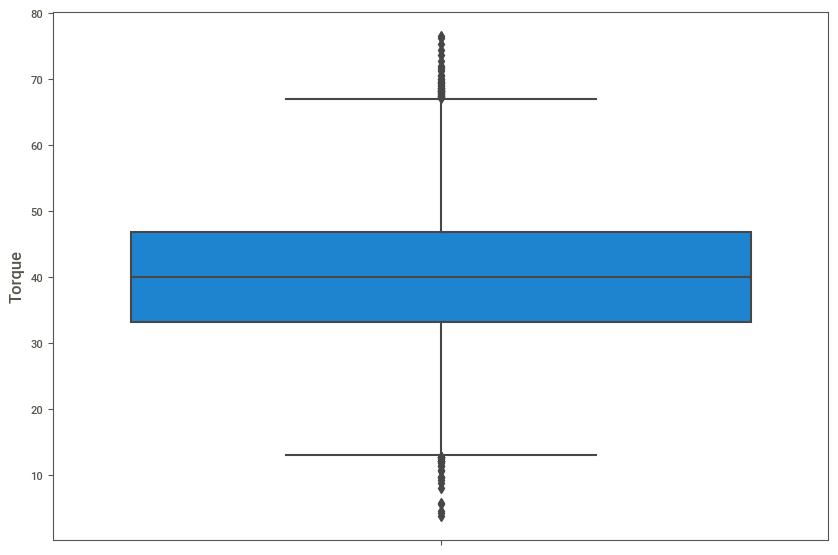

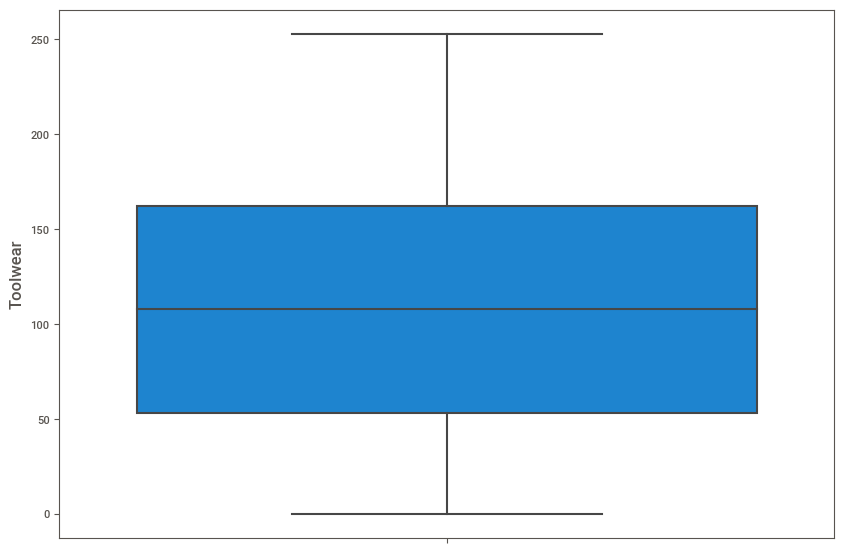

In [61]:
for Cat in Labeled_Data.iloc[:,:-2].columns:
    fig = plt.figure(figsize =(10, 7))
 
    # Creating plot
    sns.boxplot(y=Labeled_Data[Cat],data=Labeled_Data)
 
    # show plot
    plt.show()

In [62]:
def findDBScanEPS(data, n_neighbors):
    nn = NearestNeighbors(n_neighbors=n_neighbors)
    nbrs = nn.fit(data)
    distances, indices = nbrs.kneighbors(data)
    distances = np.sort(distances, axis=0)
    #distances = distances[:, 1]
    plt.plot(distances)

In [63]:
def DBScanOutlier(data):  # DBSCAN (Density-Based Spatial Clustering of Applications with Noise)
    d1 = data.copy()
    scaler = MinMaxScaler()
    d2 = scaler.fit_transform(d1)
    d2 = pd.DataFrame(d2, columns=d1.columns)
    
    findDBScanEPS(d2, 5) # calling 

    db = DBSCAN(eps=0.2, min_samples=1).fit(d2)

    core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
    core_samples_mask[db.core_sample_indices_] = True
    labels = db.labels_


    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise_ = list(labels).count(-1)
    print('Estimated number of clusters: %d' % n_clusters_)
    print('Estimated number of noise points: %d' % n_noise_)

    unique_labels = set(labels)
    colors = [plt.cm.Spectral(each)
    for each in np.linspace(0, 1, len(unique_labels))]
    plt.figure(figsize=(8, 8))
    for k, col in zip(unique_labels, colors):
        if k == -1:
        # Black used for noise.
           col = [0, 0, 0, 1]
        class_member_mask = (labels == k)

        xy = d2[class_member_mask & core_samples_mask]
        plt.plot(xy.iloc[:, 0], xy.iloc[:, 1], 'o', markerfacecolor=tuple(col), markeredgecolor='k',
                         markersize=14)

        xy = d2[class_member_mask & ~core_samples_mask]
        plt.plot(xy.iloc[:, 0], xy.iloc[:, 1], 'o', markerfacecolor=tuple(col), markeredgecolor='k',
                         markersize=6)

    plt.title('Estimated number of clusters: %d' % n_clusters_)
    plt.show()


    outlierRow = []
    for i in range(len(labels)):
        if (labels[i] == -1):
            # print(list((i, labels[i])))
            outlierRow.append(i)

    return outlierRow

#The Local Outlier Factor (LOF) algorithm is an unsupervised anomaly detection method which computes the local density deviation of a given data point with respect to its neighbors. 
#It considers as outliers the samples that have a substantially lower density than their neighbors.
def lofOutlier(scaledData, k):
    var1, var2 = 1, 2
    clf = LocalOutlierFactor(n_neighbors=k, contamination=.1)
    y_pred = clf.fit_predict(scaledData)
    LOF_Scores = clf.negative_outlier_factor_
    LOF_pred=pd.Series(y_pred).replace([-1,1],[1,0])
    LOF_anomalies=scaledData[LOF_pred==1]
    print('Estimated number of noise points: %d' % len(LOF_anomalies))
    
    for i in range (len(scaledData.iloc[:,:-2].columns)):
        fig = plt.figure(figsize =(10, 7))    
        plt.title('Local Outlier Factor(LOF), K = {}'.format(k))
        plt.scatter(scaledData.iloc[:, i], scaledData.iloc[:, i+1], color='b', s=3., label='Data points')
        radius = (LOF_Scores.max() - LOF_Scores) / (LOF_Scores.max() - LOF_Scores.min())
        plt.scatter(scaledData.iloc[:, i], scaledData.iloc[:, i+1], s=1000 * radius, edgecolors='purple',
                    facecolors='none',label='Outlier scores')
        plt.axis('tight')
        plt.ylabel('{}'.format(scaledData.columns[i]))
        plt.xlabel('{}'.format(scaledData.columns[i+1]))
        legend = plt.legend(loc='upper left')
        legend.legendHandles[0]._sizes = [10]
        legend.legendHandles[1]._sizes = [20]
        plt.show();
            
    return LOF_anomalies

def IQROutlier(data):
    quantile1 = data.quantile(0.25)
    quantile3 = data.quantile(0.75)
    IQR = quantile3 - quantile1
    print(IQR)
    outlierData = data[~((data < (quantile1 - 1.5 * IQR)) | (data > (quantile3 + 1.5 * IQR))).any(axis=1)]
    outlierData.shape
    return outlierData

def zScoreOutlier(data):
    
    zScore = np.abs(stats.zscore(data))
    #print(np.where(zScore > 3))
    outlierData = data[(zScore < 3).all(axis=1)]
    return outlierData

Estimated number of noise points: 1000


C:\Users\sunil\AppData\Local\Temp/ipykernel_11196/1419921345.py:75: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show();


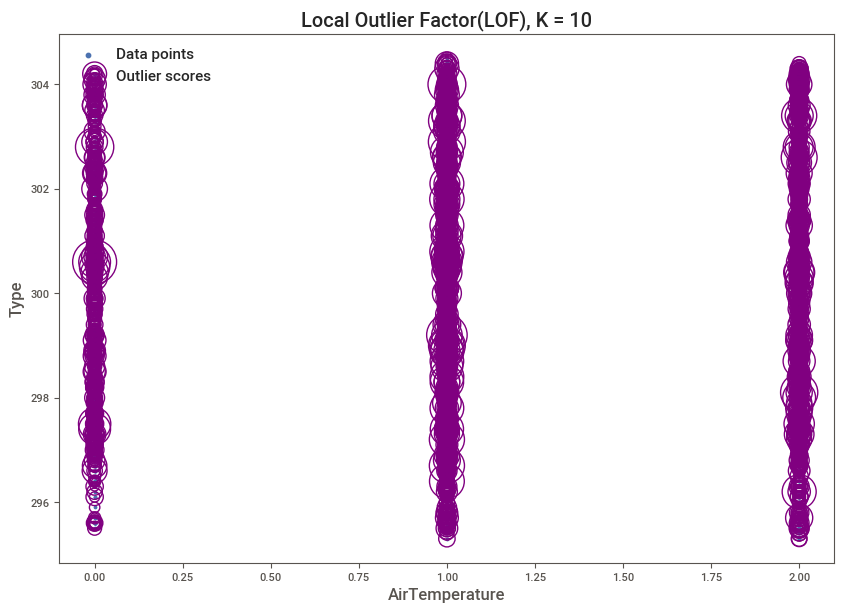

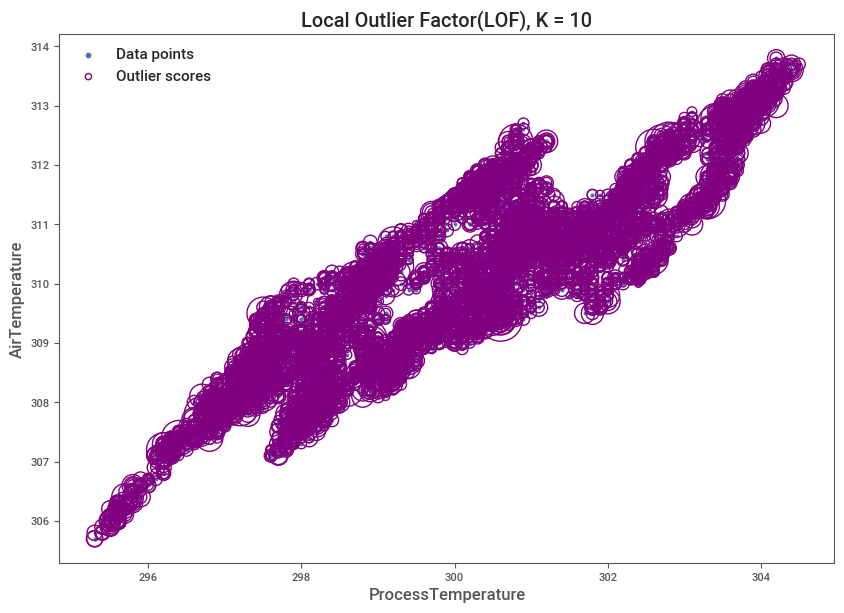

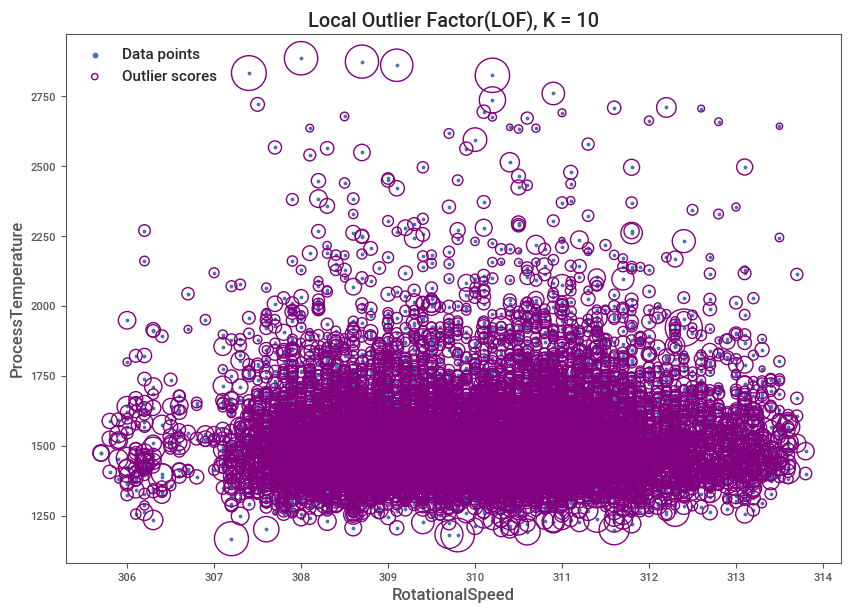

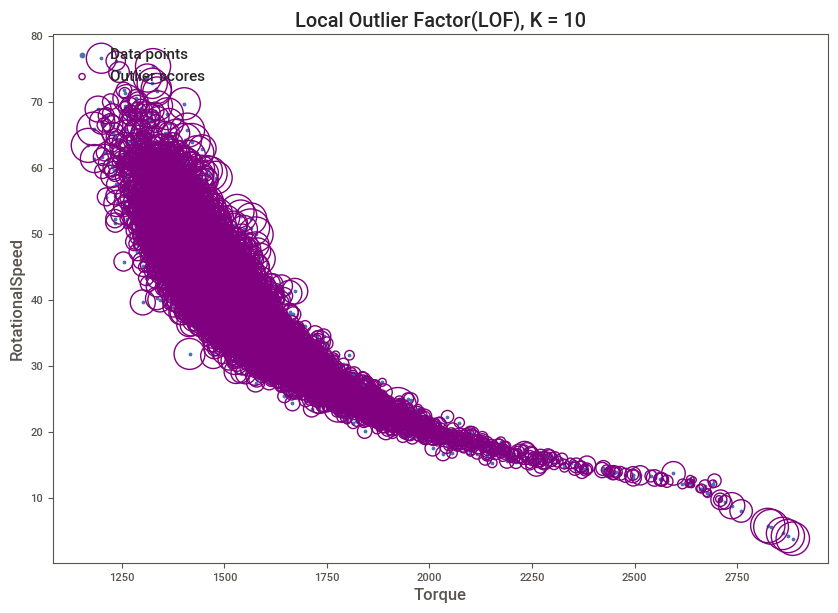

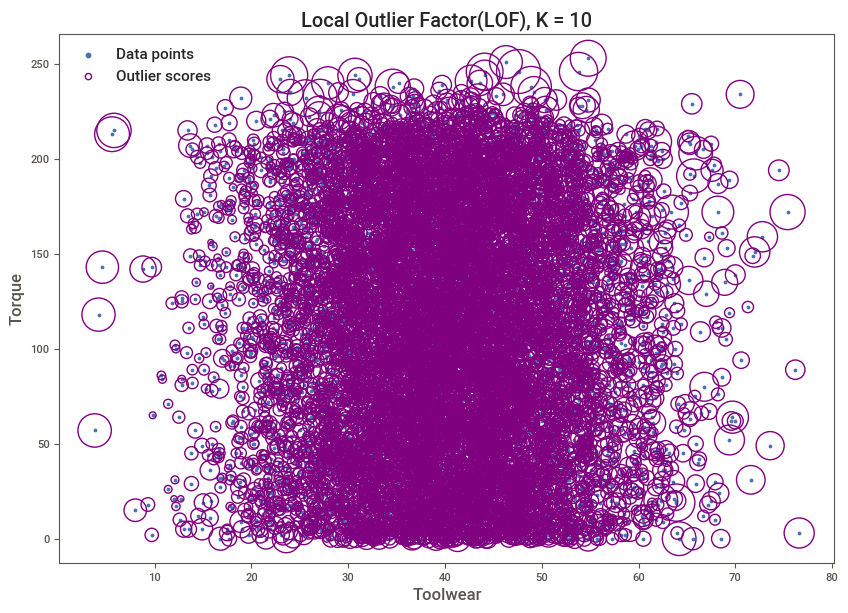

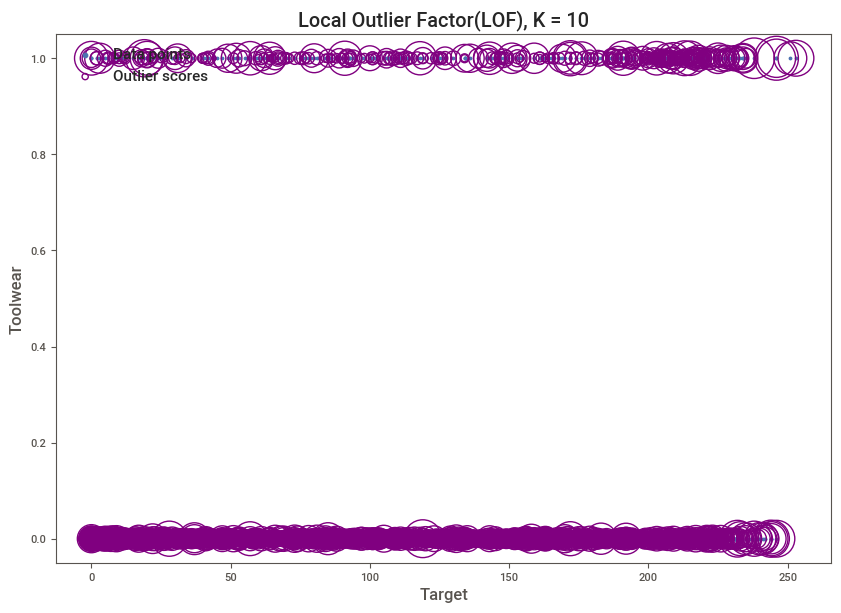

In [64]:
outliersLabelRowLof = lofOutlier(Labeled_Data,10)

In [65]:
if len(outliersLabelRowLof.index) > 0:
    outlierLabelRemovedDataLof = Labeled_Data.drop(outliersLabelRowLof.index, axis=0)
    print(len(outliersLabelRowLof.index), "Outliers data points Detected and Cleaned  ")
else:
    print( " No Outlier detected through Local Outlier Factor")

1000 Outliers data points Detected and Cleaned  


Estimated number of clusters: 118
Estimated number of noise points: 0


C:\Users\sunil\AppData\Local\Temp/ipykernel_11196/1419921345.py:40: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


Outliers are not found through DB Scan


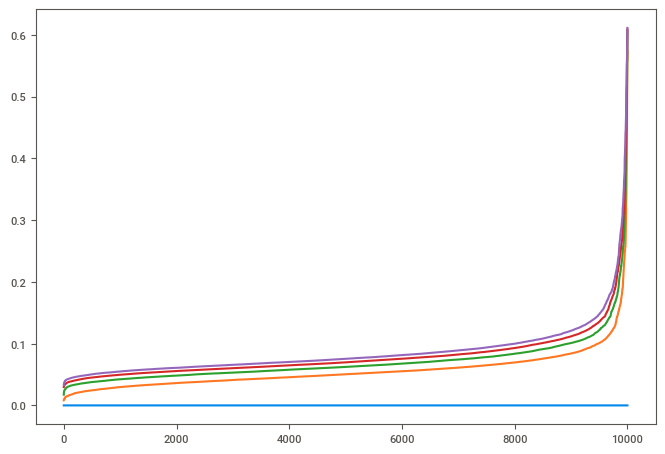

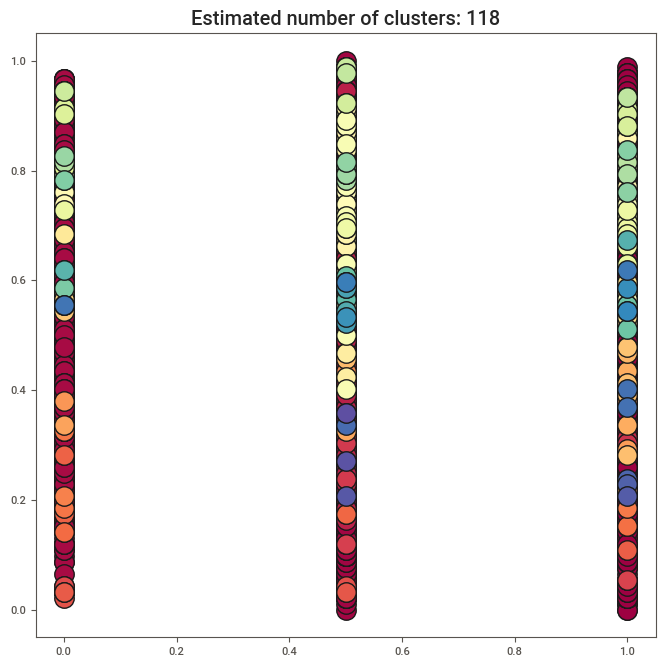

In [66]:
outliersLabelRow = DBScanOutlier(Labeled_Data)
if len(outliersLabelRow) > 0:
    labelEncodedOutlierRemovedData = Labeled_Data.drop(outliersLabelRow, axis=0)
    print(len(outliersLabelRow), "Outliers data points Detected and Cleaned  ")
else:
    print('Outliers are not found through DB Scan')
    labelEncodedOutlierRemovedData = Labeled_Data.copy()


In [67]:
IQROutlierData = IQROutlier(Labeled_Data)
IQROutlierData.shape

Type                    1.0
AirTemperature          3.2
ProcessTemperature      2.3
RotationalSpeed       189.0
Torque                 13.6
Toolwear              109.0
Target                  0.0
Failure Type            0.0
dtype: float64


(9256, 8)

In [68]:
ZscoreOutlierData = zScoreOutlier(Labeled_Data)
ZscoreOutlierData.shape

(9511, 8)

How ever IQr and Z score will remove data as per the defination of the functionality. 

From Dbscan we have not seen any outlire, so we are happy to go with dbscan.

### Scaling the Data 

In [69]:
def minMaxScaler(data):
    d1 = data.copy()
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaledData = scaler.fit_transform(d1)
    scaledData = pd.DataFrame(scaledData, columns=d1.columns)
    return scaledData

In [70]:
Scaled_Data = minMaxScaler(labelEncodedOutlierRemovedData)

In [71]:
Scaled_Data

Type  AirTemperature  ProcessTemperature  RotationalSpeed    Torque  \
0      1.0        0.304348            0.358025         0.222934  0.535714   
1      0.5        0.315217            0.370370         0.139697  0.583791   
2      0.5        0.304348            0.345679         0.192084  0.626374   
3      0.5        0.315217            0.358025         0.154249  0.490385   
4      0.5        0.315217            0.370370         0.139697  0.497253   
...    ...             ...                 ...              ...       ...   
9995   1.0        0.380435            0.333333         0.253783  0.353022   
9996   0.0        0.391304            0.333333         0.270081  0.384615   
9997   1.0        0.402174            0.358025         0.277648  0.406593   
9998   0.0        0.402174            0.370370         0.139697  0.614011   
9999   1.0        0.402174            0.370370         0.193248  0.500000   

      Toolwear  Target  Failure Type  
0     0.000000     0.0           0.2  
1     0.011858     0.0           0.2  
2     0.019763     0.0           0.2  
3     0.027668     0.0           0.2  
4     0.035573     0.0           0.2  
...        ...     ...           ...  
9995  0.055336     0.0           0.2  
9996  0.067194     0.0           0.2  
9997  0.086957     0.0           0.2  
9998  0.098814     0.0           0.2  
9999  0.118577     0.0           0.2  

[10000 rows x 8 columns]